In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import string

In [2]:
df_first = pd.read_csv(r"C:\Users\gabri\Documents\reddit_dataset.csv")
additional_df = pd.read_csv(r"C:\Users\gabri\Documents\new_reddit_dataset_.csv")

C:\Users\gabri\AppData\Local\Temp\ipykernel_12592\3364386642.py:1: DtypeWarning: Columns (4,5,7,8,13,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_first = pd.read_csv(r"C:\Users\gabri\Documents\reddit_dataset.csv")


In [3]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99918 entries, 0 to 99917
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   title                  93264 non-null  object
 1   post_id                89278 non-null  object
 2   author                 88114 non-null  object
 3   submission_date        87587 non-null  object
 4   score                  87290 non-null  object
 5   upvote_ratio           86993 non-null  object
 6   url                    86955 non-null  object
 7   num_comments           86955 non-null  object
 8   subreddit_subscribers  86955 non-null  object
 9   link_flair_text        56429 non-null  object
 10  submission_comment     65073 non-null  object
 11  comment_link           86620 non-null  object
 12  comment                86467 non-null  object
 13  comment_score          86352 non-null  object
 14  comment_created_date   86352 non-null  object
 15  Unnamed: 15        

In [4]:
df = pd.concat([df_first, additional_df])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136417 entries, 0 to 36498
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   title                  129763 non-null  object
 1   post_id                125777 non-null  object
 2   author                 124613 non-null  object
 3   submission_date        124086 non-null  object
 4   score                  123789 non-null  object
 5   upvote_ratio           123492 non-null  object
 6   url                    123454 non-null  object
 7   num_comments           123454 non-null  object
 8   subreddit_subscribers  123454 non-null  object
 9   link_flair_text        77620 non-null   object
 10  submission_comment     96877 non-null   object
 11  comment_link           123119 non-null  object
 12  comment                122966 non-null  object
 13  comment_score          122851 non-null  object
 14  comment_created_date   122851 non-null  object
 15  Unname

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113242 entries, 0 to 36498
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   title                  113241 non-null  object
 1   post_id                113205 non-null  object
 2   author                 113193 non-null  object
 3   submission_date        113188 non-null  object
 4   score                  113185 non-null  object
 5   upvote_ratio           113024 non-null  object
 6   url                    113023 non-null  object
 7   num_comments           113023 non-null  object
 8   subreddit_subscribers  113023 non-null  object
 9   link_flair_text        74377 non-null   object
 10  submission_comment     86612 non-null   object
 11  comment_link           113017 non-null  object
 12  comment                112978 non-null  object
 13  comment_score          112977 non-null  object
 14  comment_created_date   112977 non-null  object
 15  Unname

In [8]:
df2 = df.copy()

In [47]:
df2.head()

,title,post_id,author,submission_date,score,upvote_ratio,url,num_comments,subreddit_subscribers,link_flair_text,submission_comment,comment_link,comment,comment_score,comment_created_date
0,How common is capital loss harvesting?,zn1ofe,Dapper_1534,2022-12-15 19:48,0,0.4,https://www.reddit.com/r/PersonalFinanceCanada...,14,1308211,Investing,One of my funds is in a loss position for the ...,https://www.reddit.com/r/PersonalFinanceCanada...,The missing piece is that you will receive a c...,3.0,2022-12-15 21:47
1,How common is capital loss harvesting?,zn1ofe,Dapper_1534,2022-12-15 19:48,0,0.4,https://www.reddit.com/r/PersonalFinanceCanada...,14,1308211,Investing,One of my funds is in a loss position for the ...,https://www.reddit.com/r/PersonalFinanceCanada...,It's a tax gain though. And if the new fund y...,2.0,2022-12-15 19:50
2,How common is capital loss harvesting?,zn1ofe,Dapper_1534,2022-12-15 19:48,0,0.4,https://www.reddit.com/r/PersonalFinanceCanada...,14,1308211,Investing,One of my funds is in a loss position for the ...,https://www.reddit.com/r/PersonalFinanceCanada...,I think it’ll be a common strategy this year. ...,1.0,2022-12-15 20:30
3,How common is capital loss harvesting?,zn1ofe,Dapper_1534,2022-12-15 19:48,0,0.4,https://www.reddit.com/r/PersonalFinanceCanada...,14,1308211,Investing,One of my funds is in a loss position for the ...,https://www.reddit.com/r/PersonalFinanceCanada...,Common strategy for people with non registered...,1.0,2022-12-15 20:34
4,How common is capital loss harvesting?,zn1ofe,Dapper_1534,2022-12-15 19:48,0,0.4,https://www.reddit.com/r/PersonalFinanceCanada...,14,1308211,Investing,One of my funds is in a loss position for the ...,https://www.reddit.com/r/PersonalFinanceCanada...,>My investment advisor has suggested to sell i...,1.0,2022-12-16 5:45


In [9]:
# Assuming df2 is your DataFrame
df2['url'] = df2['url'].astype(str)

# Optionally, fill NaN values with a specific string
df2['url'].fillna('missing_url', inplace=True)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113242 entries, 0 to 36498
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   title                  113241 non-null  object
 1   post_id                113205 non-null  object
 2   author                 113193 non-null  object
 3   submission_date        113188 non-null  object
 4   score                  113185 non-null  object
 5   upvote_ratio           113024 non-null  object
 6   url                    113242 non-null  object
 7   num_comments           113023 non-null  object
 8   subreddit_subscribers  113023 non-null  object
 9   link_flair_text        74377 non-null   object
 10  submission_comment     86612 non-null   object
 11  comment_link           113017 non-null  object
 12  comment                112978 non-null  object
 13  comment_score          112977 non-null  object
 14  comment_created_date   112977 non-null  object
 15  Unname

In [11]:
df2.drop(columns=['Unnamed: 15'], inplace=True)
df2.drop(columns=['Unnamed: 16'], inplace=True)
df2.drop(columns=['Unnamed: 17'], inplace=True)
df2.drop(columns=['Unnamed: 18'], inplace=True)
df2.drop(columns=['Unnamed: 19'], inplace=True)
df2.drop(columns=['Unnamed: 20'], inplace=True)
df2.drop(columns=['Unnamed: 21'], inplace=True)
df2.drop(columns=['Unnamed: 22'], inplace=True)
df2.drop(columns=['Unnamed: 23'], inplace=True)
df2.drop(columns=['Unnamed: 24'], inplace=True)
df2.drop(columns=['Unnamed: 25'], inplace=True)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113242 entries, 0 to 36498
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   title                  113241 non-null  object
 1   post_id                113205 non-null  object
 2   author                 113193 non-null  object
 3   submission_date        113188 non-null  object
 4   score                  113185 non-null  object
 5   upvote_ratio           113024 non-null  object
 6   url                    113242 non-null  object
 7   num_comments           113023 non-null  object
 8   subreddit_subscribers  113023 non-null  object
 9   link_flair_text        74377 non-null   object
 10  submission_comment     86612 non-null   object
 11  comment_link           113017 non-null  object
 12  comment                112978 non-null  object
 13  comment_score          112977 non-null  object
 14  comment_created_date   112977 non-null  object
dtypes: obj

In [13]:
# Assuming df2 is your DataFrame
df2['comment'] = df2['comment'].astype(str)
df2['submission_comment'] = df2['submission_comment'].astype(str)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113242 entries, 0 to 36498
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   title                  113241 non-null  object
 1   post_id                113205 non-null  object
 2   author                 113193 non-null  object
 3   submission_date        113188 non-null  object
 4   score                  113185 non-null  object
 5   upvote_ratio           113024 non-null  object
 6   url                    113242 non-null  object
 7   num_comments           113023 non-null  object
 8   subreddit_subscribers  113023 non-null  object
 9   link_flair_text        74377 non-null   object
 10  submission_comment     113242 non-null  object
 11  comment_link           113017 non-null  object
 12  comment                113242 non-null  object
 13  comment_score          112977 non-null  object
 14  comment_created_date   112977 non-null  object
dtypes: obj

## NLP Process

In [15]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [48]:
# Sample documents
documents = df2['submission_comment'].tolist()

In [49]:
# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

In [50]:
# Preprocess the documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

In [51]:
# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 5
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

In [52]:
# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents)

Pipeline(steps=[('vect', CountVectorizer()),
                ('lda',
                 LatentDirichletAllocation(n_components=5, random_state=42))])

In [53]:
# Get the top words for each topic
feature_names = pipeline.named_steps['vect'].get_feature_names_out()
lda_components = pipeline.named_steps['lda'].components_
top_words_per_topic = []

In [54]:
for topic_weights in lda_components:
    top_word_indices = topic_weights.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_word_indices]
    top_words_per_topic.append(top_words)

In [55]:
# Print the top words for each topic
for i, top_words in enumerate(top_words_per_topic):
    print(f"Topic #{i + 1}: {', '.join(top_words)}")

Topic #1: nan, ivy, year, just, like, car, pay, time, return, dividend
Topic #2: http, broker, proof, clearing, restricted, apex, ticker, know, bad, post
Topic #3: just, card, account, year, month, time, like, credit, know, did
Topic #4: stock, investment, year, company, http, like, share, market, investing, just
Topic #5: http, service, people, money, workshop, make, comment, kevin, post, gen


In [56]:
# Transform the preprocessed documents to get the document-topic distribution
document_topic_distribution = pipeline.transform(preprocessed_documents)

In [57]:
# Print the document-topic distribution for the first document
print(f"Document Topic Distribution: {document_topic_distribution[0]}")
print(f"Document Topic Distribution: {document_topic_distribution[1]}")
print(f"Document Topic Distribution: {document_topic_distribution[2]}")
print(f"Document Topic Distribution: {document_topic_distribution[3]}")
print(f"Document Topic Distribution: {document_topic_distribution[4]}")

Document Topic Distribution: [0.08648257 0.00469305 0.30346364 0.60056949 0.00479125]
Document Topic Distribution: [0.08648257 0.00469305 0.30346364 0.60056949 0.00479125]
Document Topic Distribution: [0.08648257 0.00469305 0.30346364 0.60056949 0.00479125]
Document Topic Distribution: [0.08648257 0.00469305 0.30346364 0.60056949 0.00479125]
Document Topic Distribution: [0.08648257 0.00469305 0.30346364 0.60056949 0.00479125]


## CIBC Data

In [58]:
df3 = df2.copy()

# Specify the element you want to filter for in the link
target_element = 'CIBC'

# Reset the index to avoid duplicate index labels
df3 = df3.reset_index(drop=True)

# Use str.contains() with a regular expression to create a boolean mask
cibc_values = df3['url'].str.contains(fr'/r/{target_element}/', case=False) | df3['comment'].str.contains(target_element, case=False) | df3['submission_comment'].str.contains(target_element, case=False)

# Apply the mask to subset the DataFrame
cibc_df = df3[cibc_values]

# Display the result
cibc_df


,title,post_id,author,submission_date,score,upvote_ratio,url,num_comments,subreddit_subscribers,link_flair_text,submission_comment,comment_link,comment,comment_score,comment_created_date
3020,"Rogers is Down, Anyone plan on claiming $ for ...",vucnjs,burnttoast14,2022-07-08 10:56,3190,0.88,https://www.reddit.com/r/PersonalFinanceCanada...,1173,1308361,NaN,"The network is down, I have contacts and other...",https://www.reddit.com/r/PersonalFinanceCanada...,Thank fuck I had 300 in cash on me today for f...,1.0,2022-07-08 13:32
3372,"Rogers is Down, Anyone plan on claiming $ for ...",vucnjs,burnttoast14,2022-07-08 10:56,3190,0.88,https://www.reddit.com/r/PersonalFinanceCanada...,1173,1308361,NaN,"The network is down, I have contacts and other...",https://www.reddit.com/r/PersonalFinanceCanada...,I'm hoping they will. I wonder which banks do ...,19.0,2022-07-08 11:14
3530,"Rogers is Down, Anyone plan on claiming $ for ...",vucnjs,burnttoast14,2022-07-08 10:56,3190,0.88,https://www.reddit.com/r/PersonalFinanceCanada...,1173,1308361,NaN,"The network is down, I have contacts and other...",https://www.reddit.com/r/PersonalFinanceCanada...,CIBC uses Rogers as well. Their mobile app was...,2.0,2022-07-08 18:30
6248,Beware of “financial adviser” titles in banks....,12xj43w,intuition550,2023-04-24 10:57,3075,0.96,https://www.reddit.com/r/PersonalFinanceCanada...,436,1308396,Budget,I’m so surprised there is no class action laws...,https://www.reddit.com/r/PersonalFinanceCanada...,I opened it June of 2021 at a CIBC branch. Li...,1.0,2023-04-24 18:45
6854,Are there any banks that do not outsource thei...,17kp6bh,OkBite7599,2023-10-31 12:33,161,0.9,https://www.reddit.com/r/PersonalFinanceCanada...,160,1308397,Banking,CIBC has been outsourcing their credit card te...,https://www.reddit.com/r/PersonalFinanceCanada...,TD no longer has anything overseas. They used ...,287.0,2023-10-31 14:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113237,Accused of depositing counterfeit bills which ...,um7ik5,FitDynasty,2022-05-09 22:03:51,2,1.0,https://www.reddit.com/r/CIBC/comments/um7ik5/...,1,537,NaN,"About three weeks ago, I went to commerce Cour...",https://www.reddit.com/r/CIBC/comments/um7ik5/...,"I got a fake bill from an ATM before, this stu...",1,2022-12-24 15:24:21
113238,Overdraft left on account.,skjuzi,XmouldybreadX,2022-02-04 13:01:00,2,1.0,https://www.reddit.com/r/CIBC/comments/skjuzi/...,4,537,NaN,Hello there! My friend had to leave the countr...,https://www.reddit.com/r/CIBC/comments/skjuzi/...,So I believe it would just be the $150 plus 21...,1,2022-02-04 15:27:30
113239,Overdraft left on account.,skjuzi,XmouldybreadX,2022-02-04 13:01:00,2,1.0,https://www.reddit.com/r/CIBC/comments/skjuzi/...,4,537,NaN,Hello there! My friend had to leave the countr...,https://www.reddit.com/r/CIBC/comments/skjuzi/...,They could continue to charge monthly service ...,1,2022-02-04 23:31:26
113240,Overdraft left on account.,skjuzi,XmouldybreadX,2022-02-04 13:01:00,2,1.0,https://www.reddit.com/r/CIBC/comments/skjuzi/...,4,537,NaN,Hello there! My friend had to leave the countr...,https://www.reddit.com/r/CIBC/comments/skjuzi/...,Thank you for the fast response! he's been so ...,1,2022-02-04 15:29:33


Topic #1: cibc, bank, fund, account, etf
Topic #2: http, just, quebec, bank, canada
Topic #3: time, cibc, service, credit, bank

Document Topic Distribution: [0.02359258 0.02170759 0.95469983]


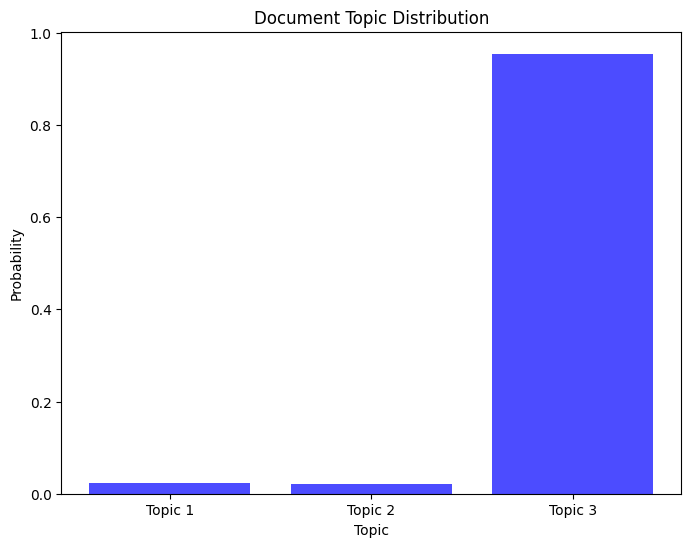


Document Topic Distribution: [0.6888815  0.28518017 0.02593832]


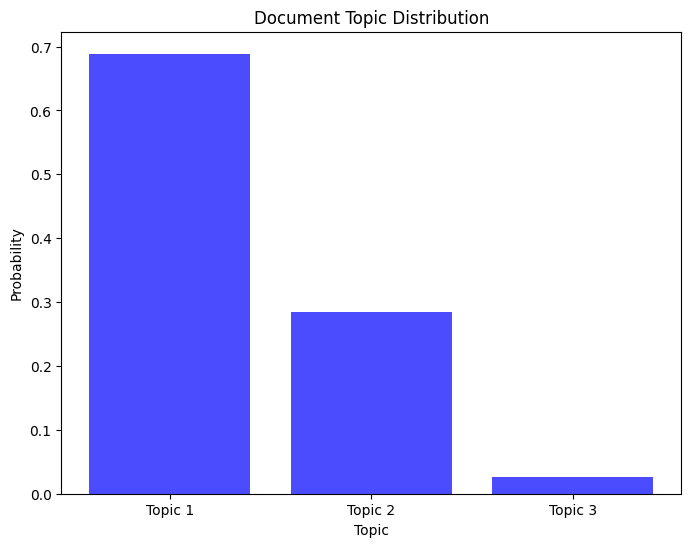


Document Topic Distribution: [0.05159976 0.04243233 0.90596791]


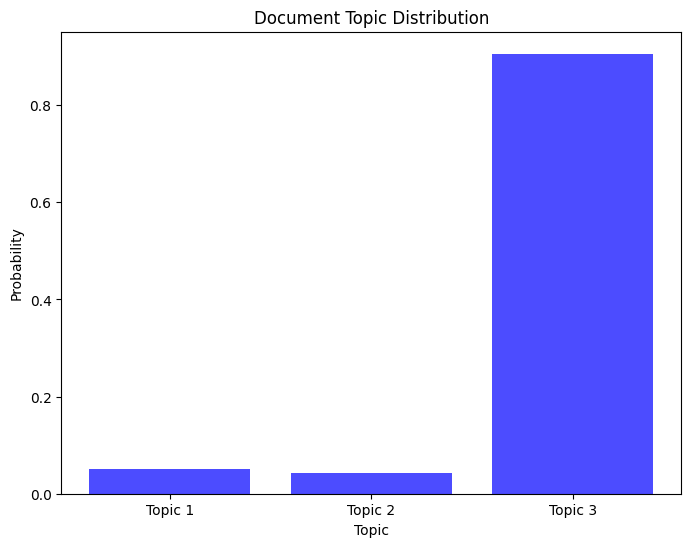

'\nprint(\'\n\' + f"Document Topic Distribution: {document_topic_distribution[3]}")\n\n# Plotting the document topic distribution\nplt.figure(figsize=(8, 6))\nplt.bar(range(len(document_topic_distribution[3])), document_topic_distribution[3], color=\'blue\', alpha=0.7)\nplt.xlabel(\'Topic\')\nplt.ylabel(\'Probability\')\nplt.title(\'Document Topic Distribution\')\nplt.xticks(range(len(document_topic_distribution[3])), labels=[f\'Topic {i+1}\' for i in range(len(document_topic_distribution[3]))])\nplt.show()\n\nprint(\'\n\' + f"Document Topic Distribution: {document_topic_distribution[4]}")\n\n# Plotting the document topic distribution\nplt.figure(figsize=(8, 6))\nplt.bar(range(len(document_topic_distribution[4])), document_topic_distribution[4], color=\'blue\', alpha=0.7)\nplt.xlabel(\'Topic\')\nplt.ylabel(\'Probability\')\nplt.title(\'Document Topic Distribution\')\nplt.xticks(range(len(document_topic_distribution[4])), labels=[f\'Topic {i+1}\' for i in range(len(document_topic_distri

In [27]:
# Sample documents
documents = cibc_df['comment'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 3
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents)

# Get the top words for each topic
feature_names = pipeline.named_steps['vect'].get_feature_names_out()
lda_components = pipeline.named_steps['lda'].components_
top_words_per_topic = []

for topic_weights in lda_components:
    top_word_indices = topic_weights.argsort()[-5:][::-1]
    top_words = [feature_names[i] for i in top_word_indices]
    top_words_per_topic.append(top_words)

# Print the top words for each topic
for i, top_words in enumerate(top_words_per_topic):
    print(f"Topic #{i + 1}: {', '.join(top_words)}")

# Transform the preprocessed documents to get the document-topic distribution
document_topic_distribution = pipeline.transform(preprocessed_documents)

# Print the document-topic distribution for the first document
print('\n' + f"Document Topic Distribution: {document_topic_distribution[0]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[0])), document_topic_distribution[0], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[0])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[0]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[1]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[1])), document_topic_distribution[1], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[1])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[1]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[2]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[2])), document_topic_distribution[2], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[2])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[2]))])
plt.show()

'''
print('\n' + f"Document Topic Distribution: {document_topic_distribution[3]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[3])), document_topic_distribution[3], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[3])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[3]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[4]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[4])), document_topic_distribution[4], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[4])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[4]))])
plt.show()
'''

## RBC Dataset

In [28]:
# Specify the element you want to filter for in the link
target_element = 'rbc'

# Reset the index to avoid duplicate index labels
df3 = df3.reset_index(drop=True)

# Use str.contains() with a regular expression to create a boolean mask
rbc_values = df3['url'].str.contains(fr'/r/{target_element}/', case=False) | df3['comment'].str.contains(target_element, case=False) | df3['submission_comment'].str.contains(target_element, case=False)

# Apply the mask to subset the DataFrame
rbc_df = df3[rbc_values]

# Display the result
rbc_df

,title,post_id,author,submission_date,score,upvote_ratio,url,num_comments,subreddit_subscribers,link_flair_text,submission_comment,comment_link,comment,comment_score,comment_created_date
3372,"Rogers is Down, Anyone plan on claiming $ for ...",vucnjs,burnttoast14,2022-07-08 10:56,3190,0.88,https://www.reddit.com/r/PersonalFinanceCanada...,1173,1308361,NaN,"The network is down, I have contacts and other...",https://www.reddit.com/r/PersonalFinanceCanada...,I'm hoping they will. I wonder which banks do ...,19.0,2022-07-08 11:14
3435,"Rogers is Down, Anyone plan on claiming $ for ...",vucnjs,burnttoast14,2022-07-08 10:56,3190,0.88,https://www.reddit.com/r/PersonalFinanceCanada...,1173,1308361,NaN,"The network is down, I have contacts and other...",https://www.reddit.com/r/PersonalFinanceCanada...,I used RBC debit and credit and multiple locat...,1.0,2022-07-08 17:57
5282,30ish year olds of Reddit. What’s your retirem...,rhpwqc,Toomuchsnowbro,2021-12-16 7:38,608,0.94,https://www.reddit.com/r/PersonalFinanceCanada...,1159,1308369,NaN,I’m 28 and just got my first “real” job making...,https://www.reddit.com/r/PersonalFinanceCanada...,How is RBC’s savings account?,1.0,2021-12-16 18:51
5999,Beware of “financial adviser” titles in banks....,12xj43w,intuition550,2023-04-24 10:57,3075,0.96,https://www.reddit.com/r/PersonalFinanceCanada...,436,1308396,Budget,I’m so surprised there is no class action laws...,https://www.reddit.com/r/PersonalFinanceCanada...,Just to be clear a financial advisor at RBC fo...,14.0,2023-04-24 12:27
6045,Beware of “financial adviser” titles in banks....,12xj43w,intuition550,2023-04-24 10:57,3075,0.96,https://www.reddit.com/r/PersonalFinanceCanada...,436,1308396,Budget,I’m so surprised there is no class action laws...,https://www.reddit.com/r/PersonalFinanceCanada...,"Of course this is RBC, the same bank that refu...",1.0,2023-04-24 23:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82531,Cancelled my Premium,xvfhyw,bringbacktheexpos,2022-10-04 09:44:04,4,0.75,https://www.reddit.com/r/wealthica/comments/xv...,5,2194,NaN,"Sadly, and I really mean that as I have suppor...",https://www.reddit.com/r/wealthica/comments/xv...,Sad to see you go.\n\nRBC Online Banking & Sco...,2,2022-10-05 10:15:20
82532,Cancelled my Premium,xvfhyw,bringbacktheexpos,2022-10-04 09:44:04,4,0.75,https://www.reddit.com/r/wealthica/comments/xv...,5,2194,NaN,"Sadly, and I really mean that as I have suppor...",https://www.reddit.com/r/wealthica/comments/xv...,Hopefully the new third party (Plaid) implemen...,1,2022-10-05 10:17:05
82533,Cancelled my Premium,xvfhyw,bringbacktheexpos,2022-10-04 09:44:04,4,0.75,https://www.reddit.com/r/wealthica/comments/xv...,5,2194,NaN,"Sadly, and I really mean that as I have suppor...",https://www.reddit.com/r/wealthica/comments/xv...,FYI: We are paying Yodlee a good amount of mon...,1,2022-10-05 10:17:45
82539,Simplii Syncing Fails every couple of days,ndaa83,PapaQBear01,2021-05-15 18:35:36,6,0.88,https://www.reddit.com/r/wealthica/comments/nd...,24,2194,NaN,I linked my Simplii account to Wealthica and i...,https://www.reddit.com/r/wealthica/comments/nd...,My RBC and Sunlife accounts keep sync failing ...,1,2021-12-30 14:02:45


Topic #1: short, share, stock, just, price
Topic #2: account, fidelity, transfer, like, just
Topic #3: good, gme, trading, trade, buy

Document Topic Distribution: [0.02463857 0.52705941 0.44830201]


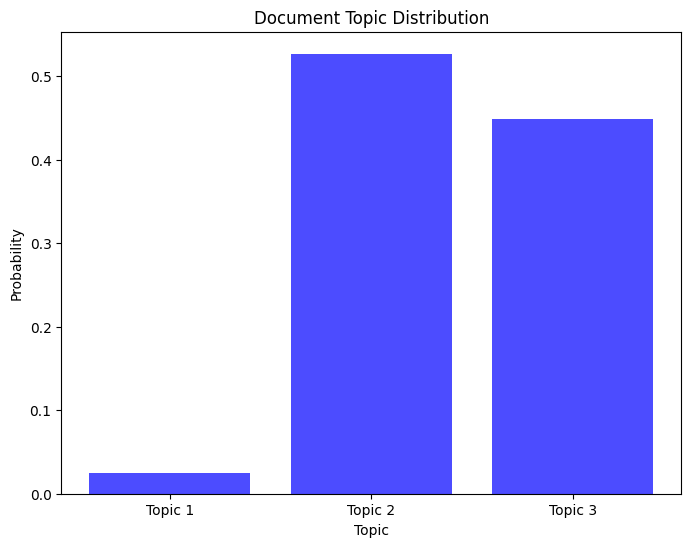


Document Topic Distribution: [0.02737094 0.03235998 0.94026908]


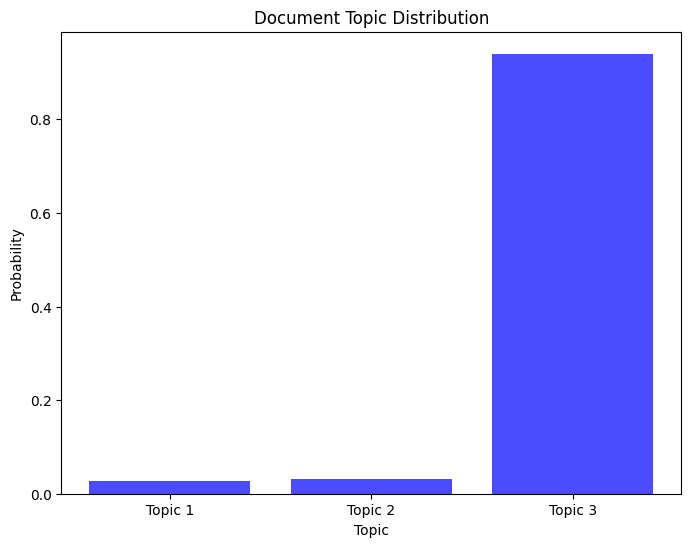


Document Topic Distribution: [0.08379968 0.82095259 0.09524773]


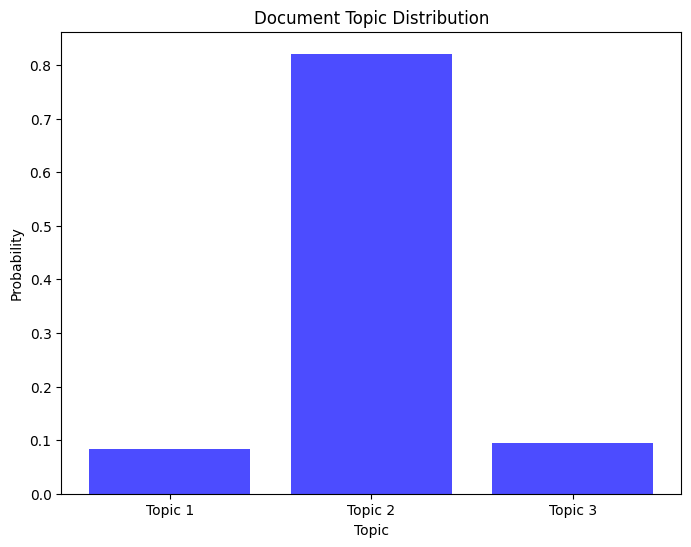

'\nprint(\'\n\' + f"Document Topic Distribution: {document_topic_distribution[3]}")\n\n# Plotting the document topic distribution\nplt.figure(figsize=(8, 6))\nplt.bar(range(len(document_topic_distribution[3])), document_topic_distribution[3], color=\'blue\', alpha=0.7)\nplt.xlabel(\'Topic\')\nplt.ylabel(\'Probability\')\nplt.title(\'Document Topic Distribution\')\nplt.xticks(range(len(document_topic_distribution[3])), labels=[f\'Topic {i+1}\' for i in range(len(document_topic_distribution[3]))])\nplt.show()\n\nprint(\'\n\' + f"Document Topic Distribution: {document_topic_distribution[4]}")\n\n# Plotting the document topic distribution\nplt.figure(figsize=(8, 6))\nplt.bar(range(len(document_topic_distribution[4])), document_topic_distribution[4], color=\'blue\', alpha=0.7)\nplt.xlabel(\'Topic\')\nplt.ylabel(\'Probability\')\nplt.title(\'Document Topic Distribution\')\nplt.xticks(range(len(document_topic_distribution[4])), labels=[f\'Topic {i+1}\' for i in range(len(document_topic_distri

In [29]:
# Sample documents
documents = rbc_df['comment'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 3
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents)

# Get the top words for each topic
feature_names = pipeline.named_steps['vect'].get_feature_names_out()
lda_components = pipeline.named_steps['lda'].components_
top_words_per_topic = []

for topic_weights in lda_components:
    top_word_indices = topic_weights.argsort()[-5:][::-1]
    top_words = [feature_names[i] for i in top_word_indices]
    top_words_per_topic.append(top_words)

# Print the top words for each topic
for i, top_words in enumerate(top_words_per_topic):
    print(f"Topic #{i + 1}: {', '.join(top_words)}")

# Transform the preprocessed documents to get the document-topic distribution
document_topic_distribution = pipeline.transform(preprocessed_documents)

# Print the document-topic distribution for the first document
print('\n' + f"Document Topic Distribution: {document_topic_distribution[0]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[0])), document_topic_distribution[0], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[0])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[0]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[1]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[1])), document_topic_distribution[1], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[1])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[1]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[2]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[2])), document_topic_distribution[2], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[2])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[2]))])
plt.show()

'''
print('\n' + f"Document Topic Distribution: {document_topic_distribution[3]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[3])), document_topic_distribution[3], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[3])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[3]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[4]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[4])), document_topic_distribution[4], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[4])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[4]))])
plt.show()
'''

## TD Dataset

In [30]:
# Specify the element you want to filter for in the link
target_element = 'tdbank'
target = 'TD'

# Reset the index to avoid duplicate index labels
df3 = df3.reset_index(drop=True)

# Use str.contains() with a regular expression to create a boolean mask
TD_values = df3['url'].str.contains(fr'/r/{target_element}/', case=False) | df3['comment'].str.contains(target, case=False) | df3['submission_comment'].str.contains(target, case=False)

# Apply the mask to subset the DataFrame
TD_df = df3[TD_values]

# Display the result
TD_df

,title,post_id,author,submission_date,score,upvote_ratio,url,num_comments,subreddit_subscribers,link_flair_text,submission_comment,comment_link,comment,comment_score,comment_created_date
74,WARNING - Kevin O'Leary Event (Workshop),bgvhmm,not-a-pyramidscheme,2019-04-24 10:46,568,0.97,https://www.reddit.com/r/PersonalFinanceCanada...,126,1308212,NaN,Was told to post here. Original post: [https...,https://www.reddit.com/r/PersonalFinanceCanada...,His wealth is taught in business schools as on...,6.0,2019-04-24 22:57
284,*Serious* Isn't the reason we pay for insuranc...,rtydgm,Infinite-ColdMech,2022-01-01 20:44,804,0.95,https://www.reddit.com/r/PersonalFinanceCanada...,345,1308213,Insurance,In the news today I saw that a young family (M...,https://www.reddit.com/r/PersonalFinanceCanada...,When I was a younger renter I had no idea this...,1.0,2022-01-02 6:57
294,*Serious* Isn't the reason we pay for insuranc...,rtydgm,Infinite-ColdMech,2022-01-01 20:44,804,0.95,https://www.reddit.com/r/PersonalFinanceCanada...,345,1308213,Insurance,In the news today I saw that a young family (M...,https://www.reddit.com/r/PersonalFinanceCanada...,"Umm, that’s false. You’re not sharing a full s...",17.0,2022-01-02 2:41
375,*Serious* Isn't the reason we pay for insuranc...,rtydgm,Infinite-ColdMech,2022-01-01 20:44,804,0.95,https://www.reddit.com/r/PersonalFinanceCanada...,345,1308213,Insurance,In the news today I saw that a young family (M...,https://www.reddit.com/r/PersonalFinanceCanada...,TD Meloche Monnex. \n\nThey were extremely fai...,8.0,2022-01-02 10:20
386,*Serious* Isn't the reason we pay for insuranc...,rtydgm,Infinite-ColdMech,2022-01-01 20:44,804,0.95,https://www.reddit.com/r/PersonalFinanceCanada...,345,1308213,Insurance,In the news today I saw that a young family (M...,https://www.reddit.com/r/PersonalFinanceCanada...,Because people are not realistic. No-one need...,2.0,2022-01-02 16:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111922,Deutsche Bank analyst program - TDI,103684a,Liz000,2023-01-04 10:23:21,1,0.67,https://www.reddit.com/r/csMajors/comments/103...,10,221702,NaN,Can anyone share the questions you are asked i...,https://www.reddit.com/r/csMajors/comments/103...,Hiii any update on this? Did anyone push throu...,1,2023-10-27 23:54:00
111923,Deutsche Bank analyst program - TDI,103684a,Liz000,2023-01-04 10:23:21,1,0.67,https://www.reddit.com/r/csMajors/comments/103...,10,221702,NaN,Can anyone share the questions you are asked i...,https://www.reddit.com/r/csMajors/comments/103...,Thanks!,1,2023-01-04 13:24:33
111924,Deutsche Bank analyst program - TDI,103684a,Liz000,2023-01-04 10:23:21,1,0.67,https://www.reddit.com/r/csMajors/comments/103...,10,221702,NaN,Can anyone share the questions you are asked i...,https://www.reddit.com/r/csMajors/comments/103...,Did you get into the program? How is it going?,1,2023-01-04 13:38:30
111925,Deutsche Bank analyst program - TDI,103684a,Liz000,2023-01-04 10:23:21,1,0.67,https://www.reddit.com/r/csMajors/comments/103...,10,221702,NaN,Can anyone share the questions you are asked i...,https://www.reddit.com/r/csMajors/comments/103...,Back in November,2,2023-01-04 13:24:18


Topic #1: year, company, account, like, stock
Topic #2: td, watch, just, like, good
Topic #3: stock, share, just, short, buy

Document Topic Distribution: [0.00359637 0.99297948 0.00342415]


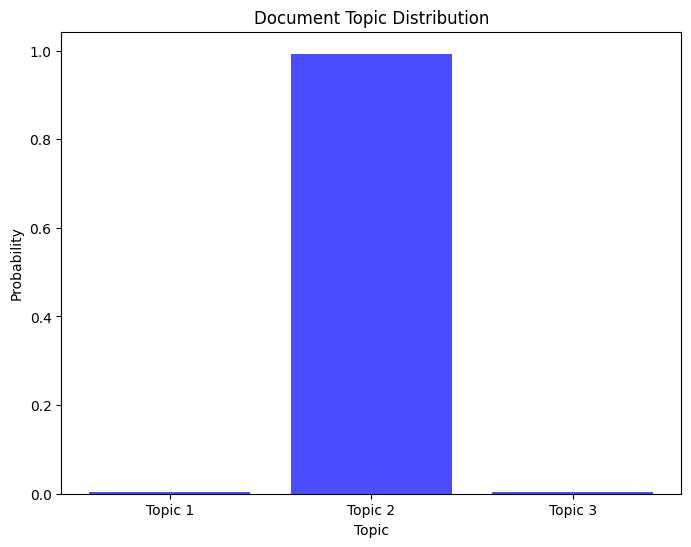


Document Topic Distribution: [0.63616982 0.34609599 0.01773419]


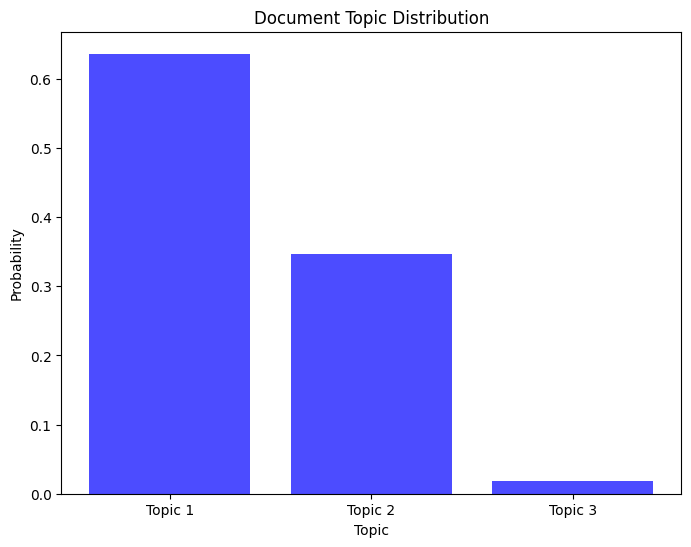


Document Topic Distribution: [0.16342465 0.71359465 0.1229807 ]


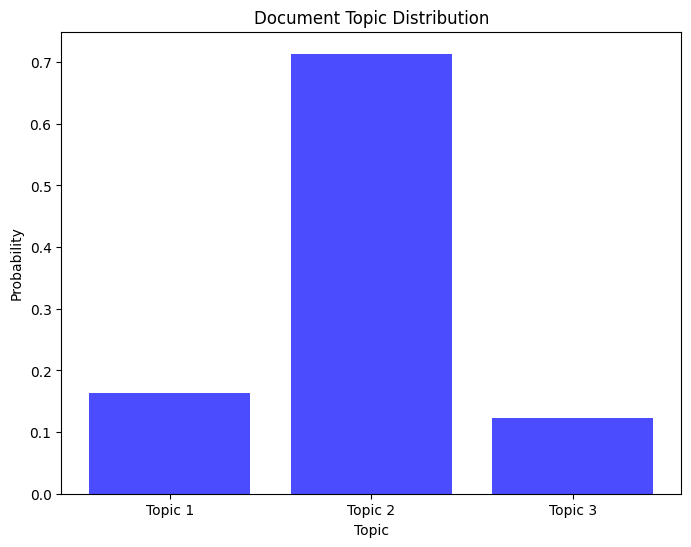

'\nprint(\'\n\' + f"Document Topic Distribution: {document_topic_distribution[3]}")\n\n# Plotting the document topic distribution\nplt.figure(figsize=(8, 6))\nplt.bar(range(len(document_topic_distribution[3])), document_topic_distribution[3], color=\'blue\', alpha=0.7)\nplt.xlabel(\'Topic\')\nplt.ylabel(\'Probability\')\nplt.title(\'Document Topic Distribution\')\nplt.xticks(range(len(document_topic_distribution[3])), labels=[f\'Topic {i+1}\' for i in range(len(document_topic_distribution[3]))])\nplt.show()\n\nprint(\'\n\' + f"Document Topic Distribution: {document_topic_distribution[4]}")\n\n# Plotting the document topic distribution\nplt.figure(figsize=(8, 6))\nplt.bar(range(len(document_topic_distribution[4])), document_topic_distribution[4], color=\'blue\', alpha=0.7)\nplt.xlabel(\'Topic\')\nplt.ylabel(\'Probability\')\nplt.title(\'Document Topic Distribution\')\nplt.xticks(range(len(document_topic_distribution[4])), labels=[f\'Topic {i+1}\' for i in range(len(document_topic_distri

In [31]:
# Sample documents
documents = TD_df['comment'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 3
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents)

# Get the top words for each topic
feature_names = pipeline.named_steps['vect'].get_feature_names_out()
lda_components = pipeline.named_steps['lda'].components_
top_words_per_topic = []

for topic_weights in lda_components:
    top_word_indices = topic_weights.argsort()[-5:][::-1]
    top_words = [feature_names[i] for i in top_word_indices]
    top_words_per_topic.append(top_words)

# Print the top words for each topic
for i, top_words in enumerate(top_words_per_topic):
    print(f"Topic #{i + 1}: {', '.join(top_words)}")

# Transform the preprocessed documents to get the document-topic distribution
document_topic_distribution = pipeline.transform(preprocessed_documents)

# Print the document-topic distribution for the first document
print('\n' + f"Document Topic Distribution: {document_topic_distribution[0]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[0])), document_topic_distribution[0], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[0])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[0]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[1]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[1])), document_topic_distribution[1], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[1])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[1]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[2]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[2])), document_topic_distribution[2], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[2])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[2]))])
plt.show()

'''
print('\n' + f"Document Topic Distribution: {document_topic_distribution[3]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[3])), document_topic_distribution[3], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[3])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[3]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[4]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[4])), document_topic_distribution[4], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[4])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[4]))])
plt.show()
'''

## BMO Dataset

In [32]:
# Specify the element you want to filter for in the link
target_element = 'bmo'

# Reset the index to avoid duplicate index labels
df3 = df3.reset_index(drop=True)

# Use str.contains() with a regular expression to create a boolean mask
bmo_values = df3['url'].str.contains(fr'/r/{target_element}/', case=False) | df3['comment'].str.contains(target_element, case=False) | df3['submission_comment'].str.contains(target_element, case=False)

# Apply the mask to subset the DataFrame
bmo_df = df3[bmo_values]

# Display the result
bmo_df

,title,post_id,author,submission_date,score,upvote_ratio,url,num_comments,subreddit_subscribers,link_flair_text,submission_comment,comment_link,comment,comment_score,comment_created_date
2320,Refund lower then inital amount charged,w4d6bc,s0m3b0dy447,2022-07-21 6:25,0,0.45,https://www.reddit.com/r/PersonalFinanceCanada...,15,1308361,Banking,Hi!\n\nSo back in May I bought tickets for a l...,https://www.reddit.com/r/PersonalFinanceCanada...,Groupon did this to me and I was never able to...,2.0,2022-07-21 8:40
2321,Refund lower then inital amount charged,w4d6bc,s0m3b0dy447,2022-07-21 6:25,0,0.45,https://www.reddit.com/r/PersonalFinanceCanada...,15,1308361,Banking,Hi!\n\nSo back in May I bought tickets for a l...,https://www.reddit.com/r/PersonalFinanceCanada...,"Yeah, no one is going to want to refund you th...",1.0,2022-07-21 6:36
2322,Refund lower then inital amount charged,w4d6bc,s0m3b0dy447,2022-07-21 6:25,0,0.45,https://www.reddit.com/r/PersonalFinanceCanada...,15,1308361,Banking,Hi!\n\nSo back in May I bought tickets for a l...,https://www.reddit.com/r/PersonalFinanceCanada...,You could let the company know about the diffe...,1.0,2022-07-21 7:50
2323,Refund lower then inital amount charged,w4d6bc,s0m3b0dy447,2022-07-21 6:25,0,0.45,https://www.reddit.com/r/PersonalFinanceCanada...,15,1308361,Banking,Hi!\n\nSo back in May I bought tickets for a l...,https://www.reddit.com/r/PersonalFinanceCanada...,Id ask for more than $8 back. They took your t...,1.0,2022-07-21 10:27
2324,Refund lower then inital amount charged,w4d6bc,s0m3b0dy447,2022-07-21 6:25,0,0.45,https://www.reddit.com/r/PersonalFinanceCanada...,15,1308361,Banking,Hi!\n\nSo back in May I bought tickets for a l...,https://www.reddit.com/r/PersonalFinanceCanada...,But the thing is that I didn't. They charged m...,9.0,2022-07-21 6:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97374,Announcing a new wiki page linked in the sideb...,sad8oa,philosophers_groove,2022-01-22 16:58:10,149,0.99,https://www.reddit.com/r/CreditCards/comments/...,51,1317400,Announcement,A new link has been added to the Useful Links ...,https://www.reddit.com/r/CreditCards/comments/...,Thanks for the good work.\n\nI just want to ma...,2,2022-01-23 08:02:56
103914,How hard is it to get a Bank of the West Busin...,yx9o1w,selahree,2022-11-16 18:21:13,4,0.84,https://www.reddit.com/r/CRedit/comments/yx9o1...,9,146442,General,Hi:\n\nI am in California and have a business ...,https://www.reddit.com/r/CRedit/comments/yx9o1...,Now is a really good time to apply for a Bank ...,2,2022-11-17 14:59:49
103915,How hard is it to get a Bank of the West Busin...,yx9o1w,selahree,2022-11-16 18:21:13,4,0.84,https://www.reddit.com/r/CRedit/comments/yx9o1...,9,146442,General,Hi:\n\nI am in California and have a business ...,https://www.reddit.com/r/CRedit/comments/yx9o1...,Thank you so much! What do you mean that my bu...,1,2022-11-17 15:17:21
103917,How hard is it to get a Bank of the West Busin...,yx9o1w,selahree,2022-11-16 18:21:13,4,0.84,https://www.reddit.com/r/CRedit/comments/yx9o1...,9,146442,General,Hi:\n\nI am in California and have a business ...,https://www.reddit.com/r/CRedit/comments/yx9o1...,"I open & close bank accounts for bonuses, and ...",2,2022-11-17 16:18:28


Topic #1: account, money, tax, stock, just
Topic #2: short, gme, share, just, broker
Topic #3: like, just, time, finn, did

Document Topic Distribution: [0.47662138 0.00903761 0.51434101]


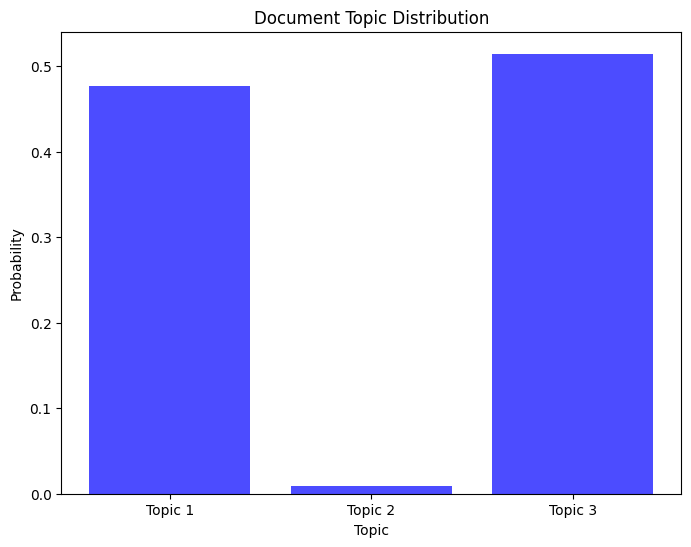


Document Topic Distribution: [0.94123451 0.02964443 0.02912106]


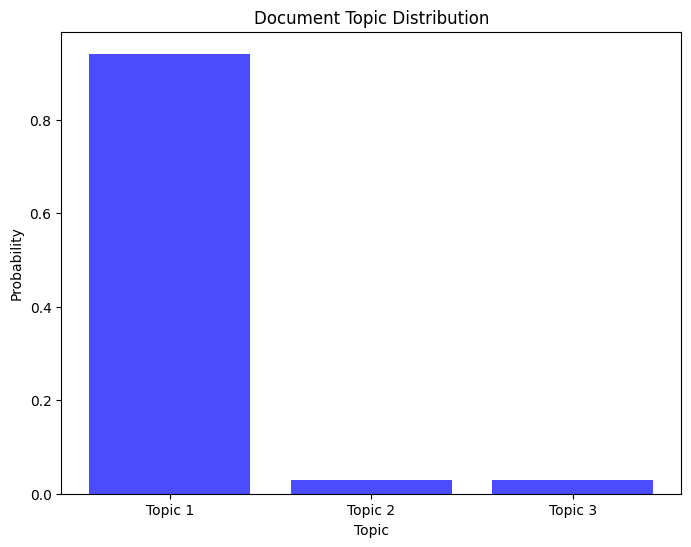


Document Topic Distribution: [0.16566607 0.21290057 0.62143337]


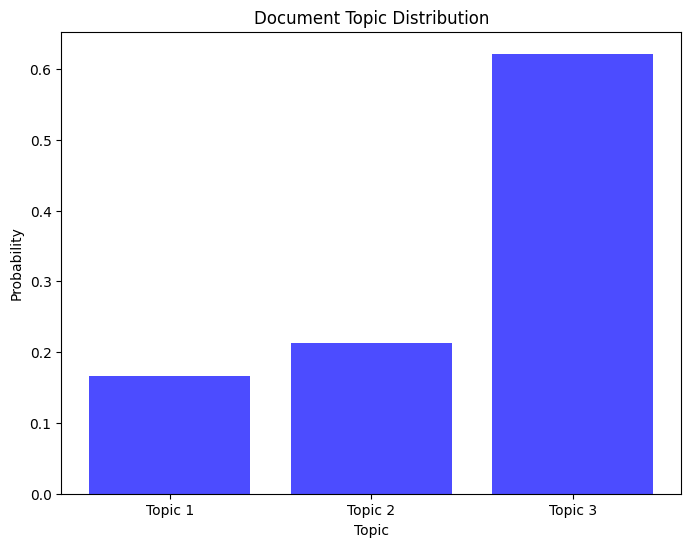

'\nprint(\'\n\' + f"Document Topic Distribution: {document_topic_distribution[3]}")\n\n# Plotting the document topic distribution\nplt.figure(figsize=(8, 6))\nplt.bar(range(len(document_topic_distribution[3])), document_topic_distribution[3], color=\'blue\', alpha=0.7)\nplt.xlabel(\'Topic\')\nplt.ylabel(\'Probability\')\nplt.title(\'Document Topic Distribution\')\nplt.xticks(range(len(document_topic_distribution[3])), labels=[f\'Topic {i+1}\' for i in range(len(document_topic_distribution[3]))])\nplt.show()\n\nprint(\'\n\' + f"Document Topic Distribution: {document_topic_distribution[4]}")\n\n# Plotting the document topic distribution\nplt.figure(figsize=(8, 6))\nplt.bar(range(len(document_topic_distribution[4])), document_topic_distribution[4], color=\'blue\', alpha=0.7)\nplt.xlabel(\'Topic\')\nplt.ylabel(\'Probability\')\nplt.title(\'Document Topic Distribution\')\nplt.xticks(range(len(document_topic_distribution[4])), labels=[f\'Topic {i+1}\' for i in range(len(document_topic_distri

In [33]:
# Sample documents
documents = bmo_df['comment'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 3
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents)

# Get the top words for each topic
feature_names = pipeline.named_steps['vect'].get_feature_names_out()
lda_components = pipeline.named_steps['lda'].components_
top_words_per_topic = []

for topic_weights in lda_components:
    top_word_indices = topic_weights.argsort()[-5:][::-1]
    top_words = [feature_names[i] for i in top_word_indices]
    top_words_per_topic.append(top_words)

# Print the top words for each topic
for i, top_words in enumerate(top_words_per_topic):
    print(f"Topic #{i + 1}: {', '.join(top_words)}")

# Transform the preprocessed documents to get the document-topic distribution
document_topic_distribution = pipeline.transform(preprocessed_documents)

# Print the document-topic distribution for the first document
print('\n' + f"Document Topic Distribution: {document_topic_distribution[0]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[0])), document_topic_distribution[0], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[0])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[0]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[1]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[1])), document_topic_distribution[1], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[1])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[1]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[2]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[2])), document_topic_distribution[2], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[2])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[2]))])
plt.show()

'''
print('\n' + f"Document Topic Distribution: {document_topic_distribution[3]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[3])), document_topic_distribution[3], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[3])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[3]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[4]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[4])), document_topic_distribution[4], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[4])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[4]))])
plt.show()
'''

## Scotiabank Dataset

In [34]:
# Specify the element you want to filter for in the link
target_element = 'scotiabank'

# Reset the index to avoid duplicate index labels
df3 = df3.reset_index(drop=True)

# Use str.contains() with a regular expression to create a boolean mask
scotiabank_values = df3['url'].str.contains(fr'/r/{target_element}/', case=False) | df3['comment'].str.contains(target_element, case=False) | df3['submission_comment'].str.contains(target_element, case=False)

# Apply the mask to subset the DataFrame
scotiabank_df = df3[scotiabank_values]

# Display the result
scotiabank_df

,title,post_id,author,submission_date,score,upvote_ratio,url,num_comments,subreddit_subscribers,link_flair_text,submission_comment,comment_link,comment,comment_score,comment_created_date
2306,A word of caution with regard to Wealthsimple ...,12its98,MELGH82,2023-04-11 14:59,127,0.78,https://www.reddit.com/r/PersonalFinanceCanada...,96,1308223,Banking,"If you figured this out right away, go easy on...",https://www.reddit.com/r/PersonalFinanceCanada...,how much are we talking? I've been very tempte...,1.0,2023-08-16 17:50
3532,"Rogers is Down, Anyone plan on claiming $ for ...",vucnjs,burnttoast14,2022-07-08 10:56,3190,0.88,https://www.reddit.com/r/PersonalFinanceCanada...,1173,1308361,NaN,"The network is down, I have contacts and other...",https://www.reddit.com/r/PersonalFinanceCanada...,"Scotiabank Online works, Scotiabank phone numb...",1.0,2022-07-08 12:05
6014,Beware of “financial adviser” titles in banks....,12xj43w,intuition550,2023-04-24 10:57,3075,0.96,https://www.reddit.com/r/PersonalFinanceCanada...,436,1308396,Budget,I’m so surprised there is no class action laws...,https://www.reddit.com/r/PersonalFinanceCanada...,A month ago I was invited to Scotiabank branch...,2.0,2023-04-24 16:49
6035,Beware of “financial adviser” titles in banks....,12xj43w,intuition550,2023-04-24 10:57,3075,0.96,https://www.reddit.com/r/PersonalFinanceCanada...,436,1308396,Budget,I’m so surprised there is no class action laws...,https://www.reddit.com/r/PersonalFinanceCanada...,I've always felt like my interactions with the...,2.0,2023-04-26 13:39
6136,Beware of “financial adviser” titles in banks....,12xj43w,intuition550,2023-04-24 10:57,3075,0.96,https://www.reddit.com/r/PersonalFinanceCanada...,436,1308396,Budget,I’m so surprised there is no class action laws...,https://www.reddit.com/r/PersonalFinanceCanada...,Scotiabank requires all of their advisors to g...,3.0,2023-04-24 13:57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92434,Scotiabank,18n99va,Accomplished-Post-51,2023-12-20 19:06:12,107,0.84,https://www.reddit.com/r/Scotiabank/comments/1...,99,1350,NaN,I spent 25 minutes on hold to try and ask ques...,https://www.reddit.com/r/Scotiabank/comments/1...,It takes one simple Google search to find out ...,1,2023-12-24 00:46:32
92435,Scotiabank,18n99va,Accomplished-Post-51,2023-12-20 19:06:12,107,0.84,https://www.reddit.com/r/Scotiabank/comments/1...,99,1350,NaN,I spent 25 minutes on hold to try and ask ques...,https://www.reddit.com/r/Scotiabank/comments/1...,I won't quibble because just by admitting you ...,1,2023-12-21 12:58:47
92436,Scotiabank,18n99va,Accomplished-Post-51,2023-12-20 19:06:12,107,0.84,https://www.reddit.com/r/Scotiabank/comments/1...,99,1350,NaN,I spent 25 minutes on hold to try and ask ques...,https://www.reddit.com/r/Scotiabank/comments/1...,Usually the order we use to find your account ...,1,2023-12-21 21:51:49
92437,SelectPay,tp63lu,HorseDikDotMpeg,2022-03-26 18:24:47,1,1.0,https://www.reddit.com/r/Scotiabank/comments/t...,2,1350,NaN,Can somebody explain to me how SelectPay works...,https://www.reddit.com/r/Scotiabank/comments/t...,It’s a service that can be useful but is a hea...,2,2022-03-29 08:13:49


Topic #1: account, just, bank, card, credit
Topic #2: fee, card, bank, pay, month
Topic #3: app, credit, card, use, like

Document Topic Distribution: [0.94896874 0.02636967 0.02466159]


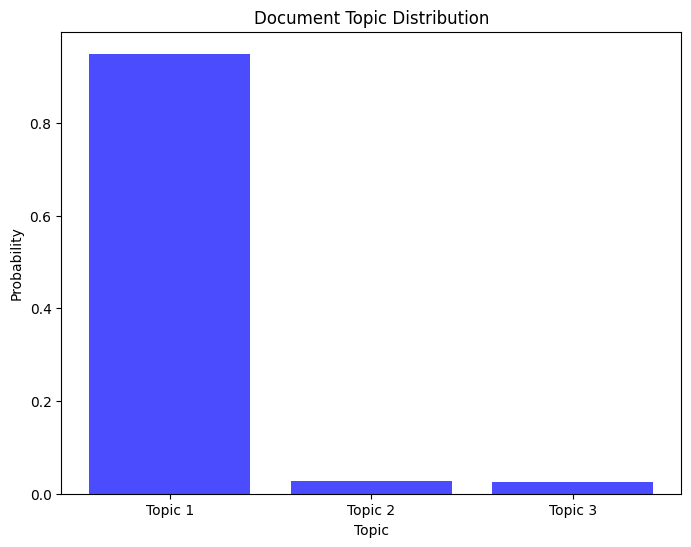


Document Topic Distribution: [0.91648002 0.04263308 0.0408869 ]


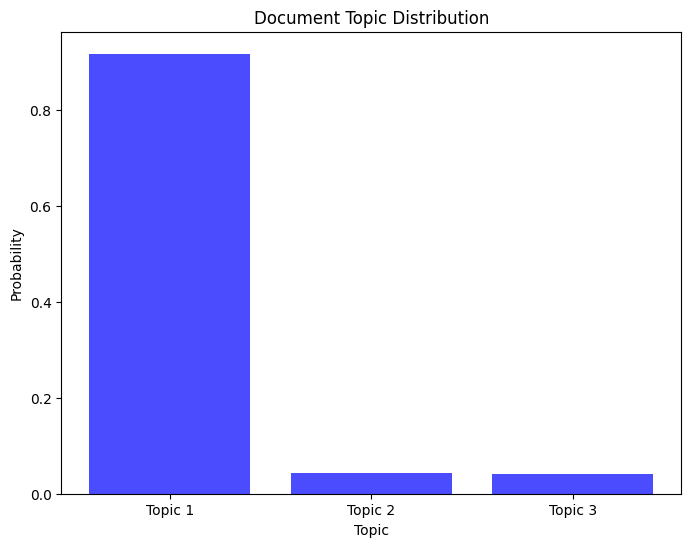


Document Topic Distribution: [0.62143614 0.35448229 0.02408158]


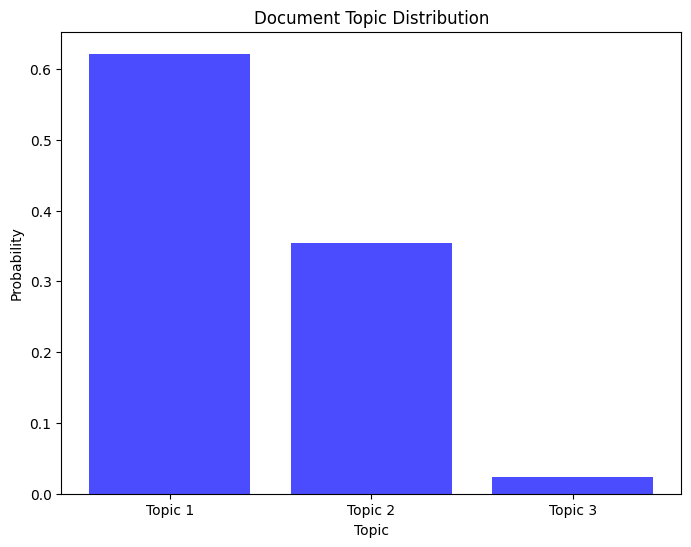

'\nprint(\'\n\' + f"Document Topic Distribution: {document_topic_distribution[3]}")\n\n# Plotting the document topic distribution\nplt.figure(figsize=(8, 6))\nplt.bar(range(len(document_topic_distribution[3])), document_topic_distribution[3], color=\'blue\', alpha=0.7)\nplt.xlabel(\'Topic\')\nplt.ylabel(\'Probability\')\nplt.title(\'Document Topic Distribution\')\nplt.xticks(range(len(document_topic_distribution[3])), labels=[f\'Topic {i+1}\' for i in range(len(document_topic_distribution[3]))])\nplt.show()\n\nprint(\'\n\' + f"Document Topic Distribution: {document_topic_distribution[4]}")\n\n# Plotting the document topic distribution\nplt.figure(figsize=(8, 6))\nplt.bar(range(len(document_topic_distribution[4])), document_topic_distribution[4], color=\'blue\', alpha=0.7)\nplt.xlabel(\'Topic\')\nplt.ylabel(\'Probability\')\nplt.title(\'Document Topic Distribution\')\nplt.xticks(range(len(document_topic_distribution[4])), labels=[f\'Topic {i+1}\' for i in range(len(document_topic_distri

In [35]:
# Sample documents
documents = scotiabank_df['comment'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 3
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents)

# Get the top words for each topic
feature_names = pipeline.named_steps['vect'].get_feature_names_out()
lda_components = pipeline.named_steps['lda'].components_
top_words_per_topic = []

for topic_weights in lda_components:
    top_word_indices = topic_weights.argsort()[-5:][::-1]
    top_words = [feature_names[i] for i in top_word_indices]
    top_words_per_topic.append(top_words)

# Print the top words for each topic
for i, top_words in enumerate(top_words_per_topic):
    print(f"Topic #{i + 1}: {', '.join(top_words)}")

# Transform the preprocessed documents to get the document-topic distribution
document_topic_distribution = pipeline.transform(preprocessed_documents)

# Print the document-topic distribution for the first document
print('\n' + f"Document Topic Distribution: {document_topic_distribution[0]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[0])), document_topic_distribution[0], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[0])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[0]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[1]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[1])), document_topic_distribution[1], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[1])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[1]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[2]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[2])), document_topic_distribution[2], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[2])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[2]))])
plt.show()

'''
print('\n' + f"Document Topic Distribution: {document_topic_distribution[3]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[3])), document_topic_distribution[3], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[3])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[3]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[4]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[4])), document_topic_distribution[4], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[4])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[4]))])
plt.show()
'''

## JPMorganChase Dataset

In [36]:
# Specify the element you want to filter for in the link
target_element = 'jpmorganchase'
target = ['jp','morgan', 'chase', 'jpmorganchase', 'jpm'] 

# Reset the index to avoid duplicate index labels
df3 = df3.reset_index(drop=True)

url_mask = df3['url'].str.contains(fr'/r/{target_element}/', case=False)

# Convert the target keywords to lowercase
lowercase_target = [keyword.lower() for keyword in target]

# Use any() to check if any element in the 'target' list is present in 'comment' and 'submission_comment'
comment_mask = df3['comment'].apply(lambda x: any(keyword in x.lower() for keyword in lowercase_target))
submission_comment_mask = df3['submission_comment'].apply(lambda x: any(keyword in x.lower() for keyword in lowercase_target))

# Combine the masks using logical OR
JP_values = url_mask | comment_mask | submission_comment_mask

# Apply the mask to subset the DataFrame
JP_df = df3[JP_values]

# Display the result
JP_df

,title,post_id,author,submission_date,score,upvote_ratio,url,num_comments,subreddit_subscribers,link_flair_text,submission_comment,comment_link,comment,comment_score,comment_created_date
11,WARNING - Kevin O'Leary Event (Workshop),bgvhmm,not-a-pyramidscheme,2019-04-24 10:46,568,0.97,https://www.reddit.com/r/PersonalFinanceCanada...,126,1308212,NaN,Was told to post here. Original post: [https...,https://www.reddit.com/r/PersonalFinanceCanada...,This is what 99% of financial seminars are. Th...,245.0,2019-04-24 11:37
12,WARNING - Kevin O'Leary Event (Workshop),bgvhmm,not-a-pyramidscheme,2019-04-24 10:46,568,0.97,https://www.reddit.com/r/PersonalFinanceCanada...,126,1308212,NaN,Was told to post here. Original post: [https...,https://www.reddit.com/r/PersonalFinanceCanada...,[deleted],76.0,2019-04-24 11:51
13,WARNING - Kevin O'Leary Event (Workshop),bgvhmm,not-a-pyramidscheme,2019-04-24 10:46,568,0.97,https://www.reddit.com/r/PersonalFinanceCanada...,126,1308212,NaN,Was told to post here. Original post: [https...,https://www.reddit.com/r/PersonalFinanceCanada...,I would not pay for anything that had Kevin O’...,117.0,2019-04-24 11:20
14,WARNING - Kevin O'Leary Event (Workshop),bgvhmm,not-a-pyramidscheme,2019-04-24 10:46,568,0.97,https://www.reddit.com/r/PersonalFinanceCanada...,126,1308212,NaN,Was told to post here. Original post: [https...,https://www.reddit.com/r/PersonalFinanceCanada...,>Regardless of your political or personal stan...,56.0,2019-04-24 15:00
15,WARNING - Kevin O'Leary Event (Workshop),bgvhmm,not-a-pyramidscheme,2019-04-24 10:46,568,0.97,https://www.reddit.com/r/PersonalFinanceCanada...,126,1308212,NaN,Was told to post here. Original post: [https...,https://www.reddit.com/r/PersonalFinanceCanada...,>He's hoping to win the conservative race and ...,36.0,2019-04-24 12:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111542,"Finally landed an internship at FAANGE, feelin...",svxnzq,midwest_csmajor,2022-02-18 20:11:32,169,0.83,https://www.reddit.com/r/csMajors/comments/svx...,51,221702,NaN,"Hey everyone,\n\nI'm a Junior CS major at a ra...",https://www.reddit.com/r/csMajors/comments/svx...,Here's a sneak peek of /r/WOSH using the [top ...,1,2022-02-18 23:23:49
111813,JPMC CFG Internship offer rate,15nvfin,Affectionate-Crab906,2023-08-10 21:56:27,4,0.83,https://www.reddit.com/r/csMajors/comments/15n...,2,221702,NaN,"Hello everyone,\n\nI'm going to be doing JP Mo...",https://www.reddit.com/r/csMajors/comments/15n...,Which location are you going to,2,2023-08-11 01:36:33
111814,JPMC CFG Internship offer rate,15nvfin,Affectionate-Crab906,2023-08-10 21:56:27,4,0.83,https://www.reddit.com/r/csMajors/comments/15n...,2,221702,NaN,"Hello everyone,\n\nI'm going to be doing JP Mo...",https://www.reddit.com/r/csMajors/comments/15n...,"Wilmington, DE. I'm nervous because this locat...",3,2023-08-11 02:16:20
112002,CS or Medicine if I can graduate with no loans?,16ar3l4,CheesecakeWestern764,2023-09-05 11:21:26,75,0.86,https://www.reddit.com/r/csMajors/comments/16a...,104,221702,NaN,"I am far more interested in medicine than CS, ...",https://www.reddit.com/r/csMajors/comments/16a...,That's my plan for now too. Currently working ...,14,2023-09-05 16:10:27


Topic #1: just, money, account, people, like
Topic #2: card, year, credit, tax, just
Topic #3: http, like, card, just, time

Document Topic Distribution: [0.92210907 0.0414918  0.03639913]


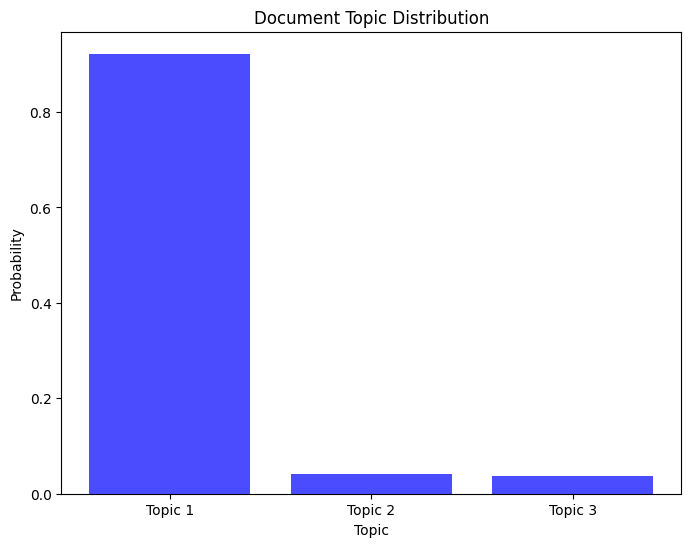


Document Topic Distribution: [0.16666848 0.16666804 0.66666347]


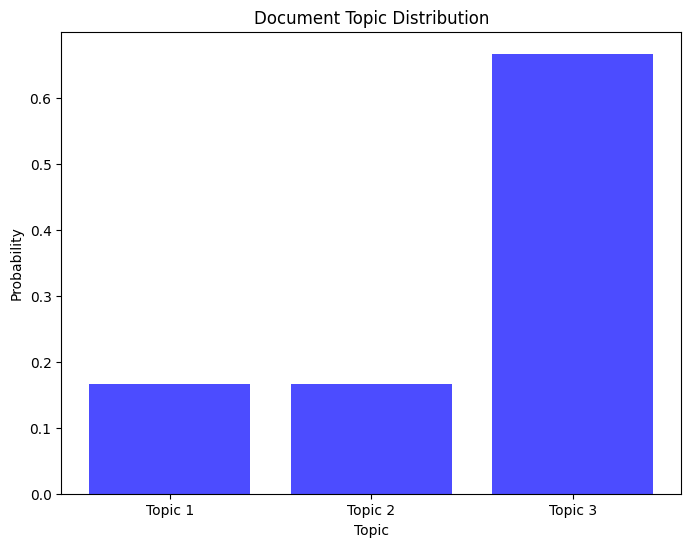


Document Topic Distribution: [0.1070147  0.82450262 0.06848268]


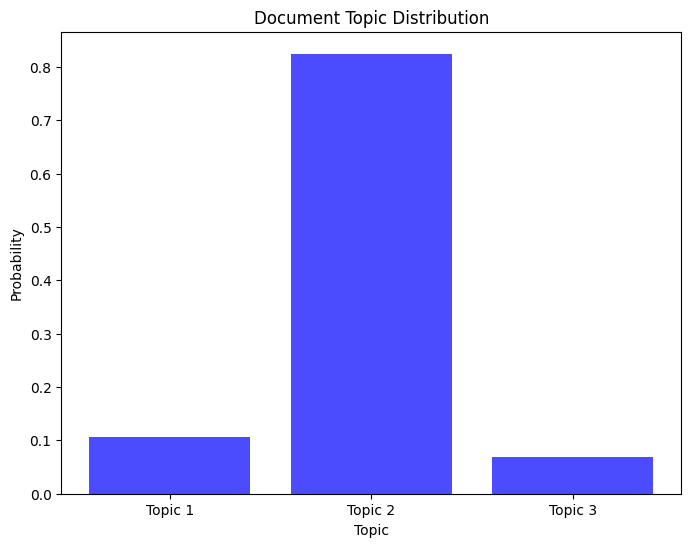

'\nprint(\'\n\' + f"Document Topic Distribution: {document_topic_distribution[3]}")\n\n# Plotting the document topic distribution\nplt.figure(figsize=(8, 6))\nplt.bar(range(len(document_topic_distribution[3])), document_topic_distribution[3], color=\'blue\', alpha=0.7)\nplt.xlabel(\'Topic\')\nplt.ylabel(\'Probability\')\nplt.title(\'Document Topic Distribution\')\nplt.xticks(range(len(document_topic_distribution[3])), labels=[f\'Topic {i+1}\' for i in range(len(document_topic_distribution[3]))])\nplt.show()\n\nprint(\'\n\' + f"Document Topic Distribution: {document_topic_distribution[4]}")\n\n# Plotting the document topic distribution\nplt.figure(figsize=(8, 6))\nplt.bar(range(len(document_topic_distribution[4])), document_topic_distribution[4], color=\'blue\', alpha=0.7)\nplt.xlabel(\'Topic\')\nplt.ylabel(\'Probability\')\nplt.title(\'Document Topic Distribution\')\nplt.xticks(range(len(document_topic_distribution[4])), labels=[f\'Topic {i+1}\' for i in range(len(document_topic_distri

In [37]:
# Sample documents
documents = JP_df['comment'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 3
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents)

# Get the top words for each topic
feature_names = pipeline.named_steps['vect'].get_feature_names_out()
lda_components = pipeline.named_steps['lda'].components_
top_words_per_topic = []

for topic_weights in lda_components:
    top_word_indices = topic_weights.argsort()[-5:][::-1]
    top_words = [feature_names[i] for i in top_word_indices]
    top_words_per_topic.append(top_words)

# Print the top words for each topic
for i, top_words in enumerate(top_words_per_topic):
    print(f"Topic #{i + 1}: {', '.join(top_words)}")

# Transform the preprocessed documents to get the document-topic distribution
document_topic_distribution = pipeline.transform(preprocessed_documents)

# Print the document-topic distribution for the first document
print('\n' + f"Document Topic Distribution: {document_topic_distribution[0]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[0])), document_topic_distribution[0], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[0])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[0]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[1]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[1])), document_topic_distribution[1], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[1])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[1]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[2]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[2])), document_topic_distribution[2], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[2])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[2]))])
plt.show()

'''
print('\n' + f"Document Topic Distribution: {document_topic_distribution[3]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[3])), document_topic_distribution[3], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[3])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[3]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[4]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[4])), document_topic_distribution[4], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[4])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[4]))])
plt.show()
'''

## WellsFargoChase Dataset

In [38]:
# Specify the element you want to filter for in the link
target_element = 'wellsfargobank'
target_element_2 = 'wellsfargounited'
target = 'WFC'
target_2 = 'WFU'

# Reset the index to avoid duplicate index labels
df3 = df3.reset_index(drop=True)

# Use str.contains() with a regular expression to create a boolean mask
WFC_values_1 = df3['url'].str.contains(fr'/r/{target_element}/', case=False) | df3['comment'].str.contains(target, case=False) | df3['submission_comment'].str.contains(target, case=False)
WFC_values_2 = df3['url'].str.contains(fr'/r/{target_element_2}/', case=False) | df3['comment'].str.contains(target_2, case=False) | df3['submission_comment'].str.contains(target_2, case=False)

WFC_values = WFC_values_1 + WFC_values_2

# Apply the mask to subset the DataFrame
WFC_df = df3[WFC_values]

# Display the result
WFC_df

,title,post_id,author,submission_date,score,upvote_ratio,url,num_comments,subreddit_subscribers,link_flair_text,submission_comment,comment_link,comment,comment_score,comment_created_date
115,WARNING - Kevin O'Leary Event (Workshop),bgvhmm,not-a-pyramidscheme,2019-04-24 10:46,568,0.97,https://www.reddit.com/r/PersonalFinanceCanada...,126,1308212,NaN,Was told to post here. Original post: [https...,https://www.reddit.com/r/PersonalFinanceCanada...,Not hyperbolic at all - he is an absolute weas...,12.0,2019-04-24 14:16
632,WARNING - Kevin O'Leary Event (Workshop),bgvhmm,not-a-pyramidscheme,2019-04-24 10:46,571,0.97,https://www.reddit.com/r/PersonalFinanceCanada...,126,1308213,NaN,Was told to post here. Original post: [https...,https://www.reddit.com/r/PersonalFinanceCanada...,Not hyperbolic at all - he is an absolute weas...,12.0,2019-04-24 14:16
758,WARNING - Kevin O'Leary Event (Workshop),bgvhmm,not-a-pyramidscheme,2019-04-24 10:46,572,0.97,https://www.reddit.com/r/PersonalFinanceCanada...,126,1308215,NaN,Was told to post here. Original post: [https...,https://www.reddit.com/r/PersonalFinanceCanada...,Not hyperbolic at all - he is an absolute weas...,12.0,2019-04-24 14:16
884,WARNING - Kevin O'Leary Event (Workshop),bgvhmm,not-a-pyramidscheme,2019-04-24 10:46,575,0.97,https://www.reddit.com/r/PersonalFinanceCanada...,126,1308215,NaN,Was told to post here. Original post: [https...,https://www.reddit.com/r/PersonalFinanceCanada...,Not hyperbolic at all - he is an absolute weas...,12.0,2019-04-24 14:16
1010,WARNING - Kevin O'Leary Event (Workshop),bgvhmm,not-a-pyramidscheme,2019-04-24 10:46,577,0.97,https://www.reddit.com/r/PersonalFinanceCanada...,126,1308215,NaN,Was told to post here. Original post: [https...,https://www.reddit.com/r/PersonalFinanceCanada...,Not hyperbolic at all - he is an absolute weas...,12.0,2019-04-24 14:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111153,PERFECT CODING OA SCORE GETS REJECTED FROM ROBLOX,wvd2zx,The1Force,2022-08-22 22:47:04,154,0.9,https://www.reddit.com/r/csMajors/comments/wvd...,51,221702,NaN,I just received a rejection email from Roblox....,https://www.reddit.com/r/csMajors/comments/wvd...,To be honest like I’m not excusing this behavi...,4,2022-08-23 16:37:17
112215,CS majors who complain about diversity have un...,15s5x0e,Comprehensive_Bet920,2023-08-15 17:37:30,600,0.66,https://www.reddit.com/r/csMajors/comments/15s...,872,221702,NaN,CS majors complain about “diversity hiring” an...,https://www.reddit.com/r/csMajors/comments/15s...,"Yeah maybe, but diversity hiring is not the so...",1,2023-08-16 07:57:36
112442,CS majors who complain about diversity have un...,15s5x0e,Comprehensive_Bet920,2023-08-15 17:37:30,600,0.66,https://www.reddit.com/r/csMajors/comments/15s...,872,221702,NaN,CS majors complain about “diversity hiring” an...,https://www.reddit.com/r/csMajors/comments/15s...,yes! or how phone cameras were awful at detect...,5,2023-08-16 10:19:53
112628,CS majors who complain about diversity have un...,15s5x0e,Comprehensive_Bet920,2023-08-15 17:37:30,600,0.66,https://www.reddit.com/r/csMajors/comments/15s...,872,221702,NaN,CS majors complain about “diversity hiring” an...,https://www.reddit.com/r/csMajors/comments/15s...,>Dude tech is overwhelmingly Asian!\n\nDo you ...,4,2023-08-16 08:40:53


Topic #1: card, http, die, awful, account
Topic #2: year, just, money, retirement, house
Topic #3: people, awful, just, like, plan

Document Topic Distribution: [0.00960632 0.00978889 0.98060478]


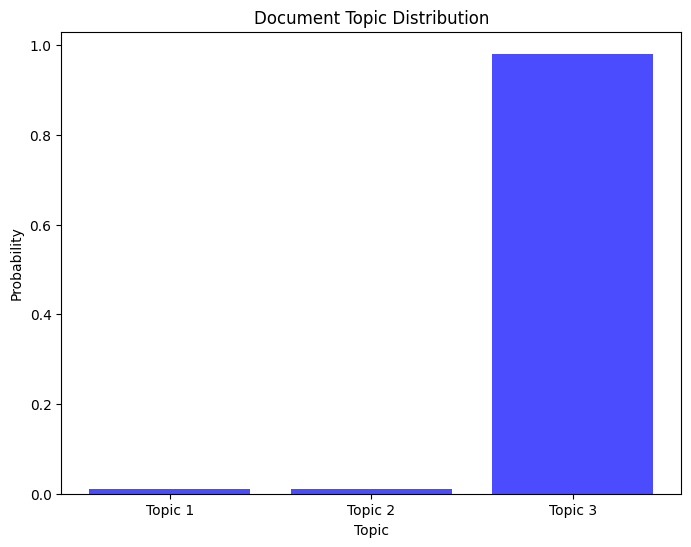


Document Topic Distribution: [0.00960632 0.00978889 0.98060478]


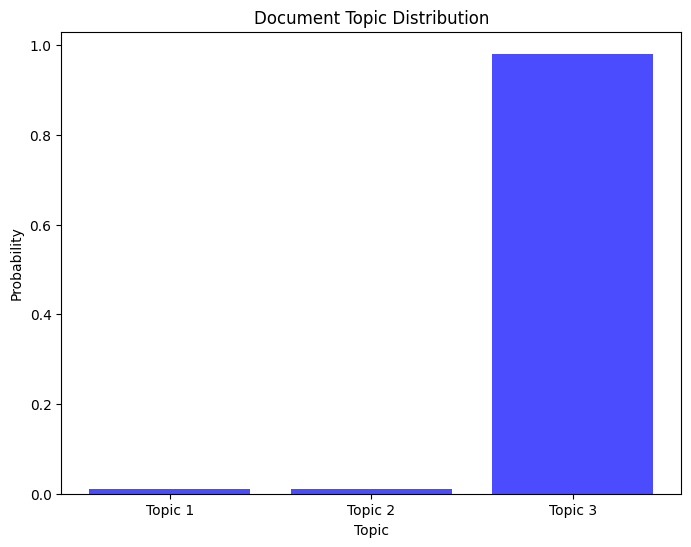


Document Topic Distribution: [0.00960632 0.00978889 0.98060478]


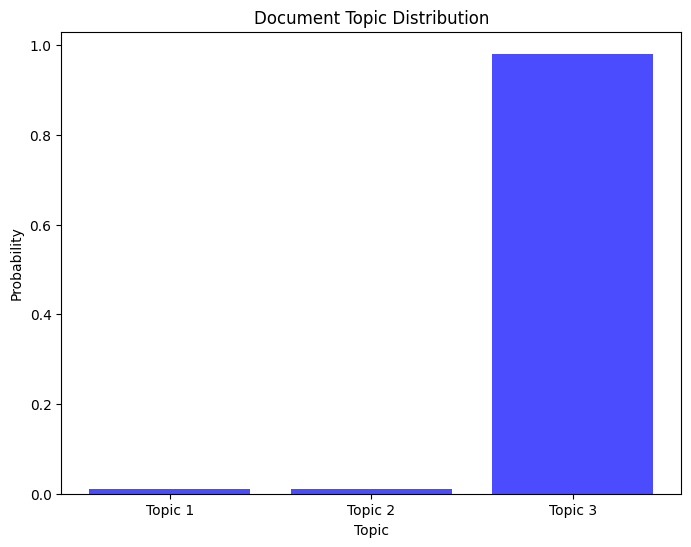

'\nprint(\'\n\' + f"Document Topic Distribution: {document_topic_distribution[3]}")\n\n# Plotting the document topic distribution\nplt.figure(figsize=(8, 6))\nplt.bar(range(len(document_topic_distribution[3])), document_topic_distribution[3], color=\'blue\', alpha=0.7)\nplt.xlabel(\'Topic\')\nplt.ylabel(\'Probability\')\nplt.title(\'Document Topic Distribution\')\nplt.xticks(range(len(document_topic_distribution[3])), labels=[f\'Topic {i+1}\' for i in range(len(document_topic_distribution[3]))])\nplt.show()\n\nprint(\'\n\' + f"Document Topic Distribution: {document_topic_distribution[4]}")\n\n# Plotting the document topic distribution\nplt.figure(figsize=(8, 6))\nplt.bar(range(len(document_topic_distribution[4])), document_topic_distribution[4], color=\'blue\', alpha=0.7)\nplt.xlabel(\'Topic\')\nplt.ylabel(\'Probability\')\nplt.title(\'Document Topic Distribution\')\nplt.xticks(range(len(document_topic_distribution[4])), labels=[f\'Topic {i+1}\' for i in range(len(document_topic_distri

In [39]:
# Sample documents
documents = WFC_df['comment'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 3
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents)

# Get the top words for each topic
feature_names = pipeline.named_steps['vect'].get_feature_names_out()
lda_components = pipeline.named_steps['lda'].components_
top_words_per_topic = []

for topic_weights in lda_components:
    top_word_indices = topic_weights.argsort()[-5:][::-1]
    top_words = [feature_names[i] for i in top_word_indices]
    top_words_per_topic.append(top_words)

# Print the top words for each topic
for i, top_words in enumerate(top_words_per_topic):
    print(f"Topic #{i + 1}: {', '.join(top_words)}")

# Transform the preprocessed documents to get the document-topic distribution
document_topic_distribution = pipeline.transform(preprocessed_documents)

# Print the document-topic distribution for the first document
print('\n' + f"Document Topic Distribution: {document_topic_distribution[0]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[0])), document_topic_distribution[0], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[0])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[0]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[1]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[1])), document_topic_distribution[1], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[1])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[1]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[2]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[2])), document_topic_distribution[2], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[2])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[2]))])
plt.show()

'''
print('\n' + f"Document Topic Distribution: {document_topic_distribution[3]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[3])), document_topic_distribution[3], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[3])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[3]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[4]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[4])), document_topic_distribution[4], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[4])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[4]))])
plt.show()
'''

## Bank of America Dataset

In [40]:
# Specify the element you want to filter for in the link
target_element = 'bankofamerica_'
target = ['bankofamerica','BofA', 'BoA'] 

# Reset the index to avoid duplicate index labels
df3 = df3.reset_index(drop=True)

url_mask = df3['url'].str.contains(fr'/r/{target_element}/', case=False)

# Convert the target keywords to lowercase
lowercase_target = [keyword.lower() for keyword in target]

# Use any() to check if any element in the 'target' list is present in 'comment' and 'submission_comment'
comment_mask = df3['comment'].apply(lambda x: any(keyword in x.lower() for keyword in lowercase_target))
submission_comment_mask = df3['submission_comment'].apply(lambda x: any(keyword in x.lower() for keyword in lowercase_target))

# Combine the masks using logical OR
Bank_of_America_values = url_mask | comment_mask | submission_comment_mask

# Apply the mask to subset the DataFrame
Bank_of_America_df = df3[Bank_of_America_values]

# Display the result
Bank_of_America_df

,title,post_id,author,submission_date,score,upvote_ratio,url,num_comments,subreddit_subscribers,link_flair_text,submission_comment,comment_link,comment,comment_score,comment_created_date
404,*Serious* Isn't the reason we pay for insuranc...,rtydgm,Infinite-ColdMech,2022-01-01 20:44,804,0.95,https://www.reddit.com/r/PersonalFinanceCanada...,345,1308213,Insurance,In the news today I saw that a young family (M...,https://www.reddit.com/r/PersonalFinanceCanada...,This is really untrue. Across the board insura...,30.0,2022-01-01 21:17
475,*Serious* Isn't the reason we pay for insuranc...,rtydgm,Infinite-ColdMech,2022-01-01 20:44,804,0.95,https://www.reddit.com/r/PersonalFinanceCanada...,345,1308213,Insurance,In the news today I saw that a young family (M...,https://www.reddit.com/r/PersonalFinanceCanada...,So part of the qualifier to my opinion on the ...,2.0,2022-01-02 18:28
1500,Have any of you had to say no to family/friend...,w155yp,NineteenSixtySix,2022-07-17 7:16,659,0.94,https://www.reddit.com/r/PersonalFinanceCanada...,403,1308215,Budget,nan,https://www.reddit.com/r/PersonalFinanceCanada...,Flights are getting cancelled as people are re...,1.0,2022-07-17 12:30
1643,Have any of you had to say no to family/friend...,w155yp,NineteenSixtySix,2022-07-17 7:16,659,0.94,https://www.reddit.com/r/PersonalFinanceCanada...,403,1308215,Budget,nan,https://www.reddit.com/r/PersonalFinanceCanada...,The ULCC business model is usually based on ge...,3.0,2022-07-17 20:17
1876,Have any of you had to say no to family/friend...,w155yp,NineteenSixtySix,2022-07-17 7:16,658,0.94,https://www.reddit.com/r/PersonalFinanceCanada...,403,1308215,Budget,nan,https://www.reddit.com/r/PersonalFinanceCanada...,Flights are getting cancelled as people are re...,1.0,2022-07-17 12:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113077,Am I ready to start applying for internships/ ...,14ox82r,SomewhereMajestic642,2023-07-02 15:43:13,10,0.78,https://www.reddit.com/r/csMajors/comments/14o...,5,221702,NaN,I have a school project which is a board game ...,https://www.reddit.com/r/csMajors/comments/14o...,"That's a lot more than I've done, and I got an...",5,2023-07-02 21:48:07
113078,Am I ready to start applying for internships/ ...,14ox82r,SomewhereMajestic642,2023-07-02 15:43:13,10,0.78,https://www.reddit.com/r/csMajors/comments/14o...,5,221702,NaN,I have a school project which is a board game ...,https://www.reddit.com/r/csMajors/comments/14o...,But how do I get interviews in the first place...,2,2023-07-02 17:04:39
113079,Am I ready to start applying for internships/ ...,14ox82r,SomewhereMajestic642,2023-07-02 15:43:13,10,0.78,https://www.reddit.com/r/csMajors/comments/14o...,5,221702,NaN,I have a school project which is a board game ...,https://www.reddit.com/r/csMajors/comments/14o...,you can muster 1 to 3 projects to put in your ...,2,2023-07-02 17:50:18
113080,Am I ready to start applying for internships/ ...,14ox82r,SomewhereMajestic642,2023-07-02 15:43:13,10,0.78,https://www.reddit.com/r/csMajors/comments/14o...,5,221702,NaN,I have a school project which is a board game ...,https://www.reddit.com/r/csMajors/comments/14o...,Connections,1,2023-07-02 17:44:28


Topic #1: number, like, just, company, know
Topic #2: card, just, account, credit, bank
Topic #3: people, like, just, care, year

Document Topic Distribution: [0.43421589 0.36766909 0.19811502]


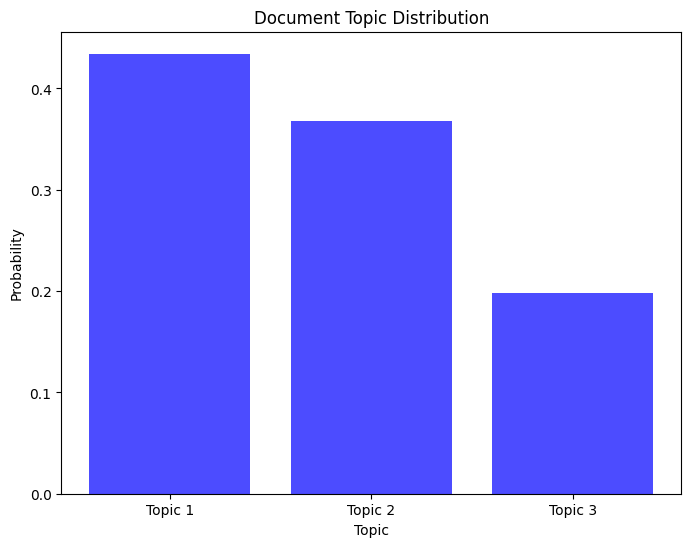


Document Topic Distribution: [0.70703951 0.00597519 0.28698531]


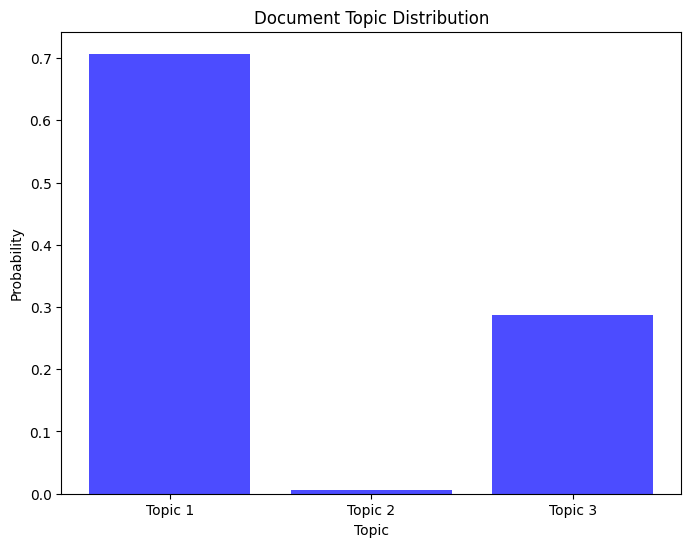


Document Topic Distribution: [0.02011893 0.5891114  0.39076968]


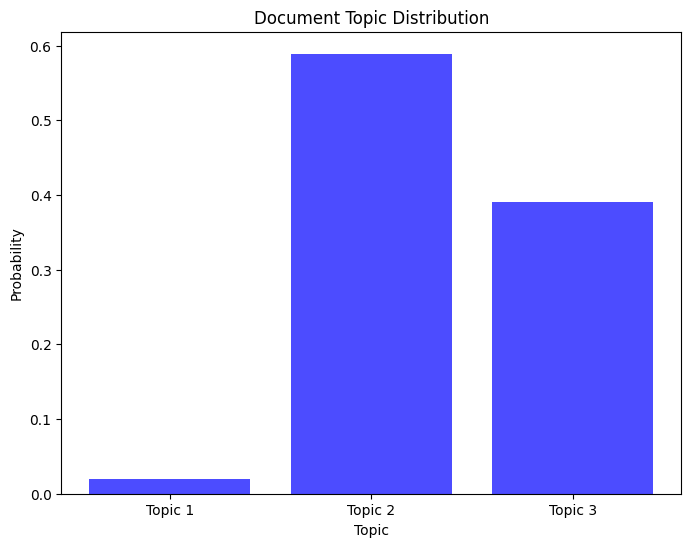

'\nprint(\'\n\' + f"Document Topic Distribution: {document_topic_distribution[3]}")\n\n# Plotting the document topic distribution\nplt.figure(figsize=(8, 6))\nplt.bar(range(len(document_topic_distribution[3])), document_topic_distribution[3], color=\'blue\', alpha=0.7)\nplt.xlabel(\'Topic\')\nplt.ylabel(\'Probability\')\nplt.title(\'Document Topic Distribution\')\nplt.xticks(range(len(document_topic_distribution[3])), labels=[f\'Topic {i+1}\' for i in range(len(document_topic_distribution[3]))])\nplt.show()\n\nprint(\'\n\' + f"Document Topic Distribution: {document_topic_distribution[4]}")\n\n# Plotting the document topic distribution\nplt.figure(figsize=(8, 6))\nplt.bar(range(len(document_topic_distribution[4])), document_topic_distribution[4], color=\'blue\', alpha=0.7)\nplt.xlabel(\'Topic\')\nplt.ylabel(\'Probability\')\nplt.title(\'Document Topic Distribution\')\nplt.xticks(range(len(document_topic_distribution[4])), labels=[f\'Topic {i+1}\' for i in range(len(document_topic_distri

In [41]:
# Sample documents
documents = Bank_of_America_df['comment'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 3
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents)

# Get the top words for each topic
feature_names = pipeline.named_steps['vect'].get_feature_names_out()
lda_components = pipeline.named_steps['lda'].components_
top_words_per_topic = []

for topic_weights in lda_components:
    top_word_indices = topic_weights.argsort()[-5:][::-1]
    top_words = [feature_names[i] for i in top_word_indices]
    top_words_per_topic.append(top_words)

# Print the top words for each topic
for i, top_words in enumerate(top_words_per_topic):
    print(f"Topic #{i + 1}: {', '.join(top_words)}")

# Transform the preprocessed documents to get the document-topic distribution
document_topic_distribution = pipeline.transform(preprocessed_documents)

# Print the document-topic distribution for the first document
print('\n' + f"Document Topic Distribution: {document_topic_distribution[0]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[0])), document_topic_distribution[0], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[0])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[0]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[1]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[1])), document_topic_distribution[1], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[1])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[1]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[2]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[2])), document_topic_distribution[2], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[2])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[2]))])
plt.show()

'''
print('\n' + f"Document Topic Distribution: {document_topic_distribution[3]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[3])), document_topic_distribution[3], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[3])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[3]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[4]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[4])), document_topic_distribution[4], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[4])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[4]))])
plt.show()
'''

## Citigroup Dataset

In [42]:
# Specify the element you want to filter for in the link
target_element = 'citigroup'
target = ['citigroup','citi'] 

# Reset the index to avoid duplicate index labels
df3 = df3.reset_index(drop=True)

url_mask = df3['url'].str.contains(fr'/r/{target_element}/', case=False)

# Convert the target keywords to lowercase
lowercase_target = [keyword.lower() for keyword in target]

# Use any() to check if any element in the 'target' list is present in 'comment' and 'submission_comment'
comment_mask = df3['comment'].apply(lambda x: any(keyword in x.lower() for keyword in lowercase_target))
submission_comment_mask = df3['submission_comment'].apply(lambda x: any(keyword in x.lower() for keyword in lowercase_target))

# Combine the masks using logical OR
citigroup_values = url_mask | comment_mask | submission_comment_mask

# Apply the mask to subset the DataFrame
citigroup_df = df3[citigroup_values]
citigroup_df.drop_duplicates(inplace=True)

# Display the result
citigroup_df

C:\Users\gabri\AppData\Local\Temp\ipykernel_12592\1641672885.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citigroup_df.drop_duplicates(inplace=True)


,title,post_id,author,submission_date,score,upvote_ratio,url,num_comments,subreddit_subscribers,link_flair_text,submission_comment,comment_link,comment,comment_score,comment_created_date
265,*Serious* Isn't the reason we pay for insuranc...,rtydgm,Infinite-ColdMech,2022-01-01 20:44,804,0.95,https://www.reddit.com/r/PersonalFinanceCanada...,345,1308213,Insurance,In the news today I saw that a young family (M...,https://www.reddit.com/r/PersonalFinanceCanada...,If you can even GET insurance. I haven’t neede...,1.0,2023-07-27 17:47
294,*Serious* Isn't the reason we pay for insuranc...,rtydgm,Infinite-ColdMech,2022-01-01 20:44,804,0.95,https://www.reddit.com/r/PersonalFinanceCanada...,345,1308213,Insurance,In the news today I saw that a young family (M...,https://www.reddit.com/r/PersonalFinanceCanada...,"Umm, that’s false. You’re not sharing a full s...",17.0,2022-01-02 2:41
1642,Have any of you had to say no to family/friend...,w155yp,NineteenSixtySix,2022-07-17 7:16,659,0.94,https://www.reddit.com/r/PersonalFinanceCanada...,403,1308215,Budget,nan,https://www.reddit.com/r/PersonalFinanceCanada...,It’s about $125-150 to fly Toronto to Montreal...,21.0,2022-07-17 12:55
1646,Have any of you had to say no to family/friend...,w155yp,NineteenSixtySix,2022-07-17 7:16,659,0.94,https://www.reddit.com/r/PersonalFinanceCanada...,403,1308215,Budget,nan,https://www.reddit.com/r/PersonalFinanceCanada...,Regional flights were always expensive and thi...,1.0,2022-07-17 12:14
1648,Have any of you had to say no to family/friend...,w155yp,NineteenSixtySix,2022-07-17 7:16,659,0.94,https://www.reddit.com/r/PersonalFinanceCanada...,403,1308215,Budget,nan,https://www.reddit.com/r/PersonalFinanceCanada...,Okay. I'm just showing an apples to apples rou...,3.0,2022-07-17 13:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113175,FBU Offer!!,q2qkg1,TheOneDebator,2021-10-06 14:37:01,60,0.94,https://www.reddit.com/r/csMajors/comments/q2q...,52,221702,NaN,I got a call from my recruiter this morning an...,https://www.reddit.com/r/csMajors/comments/q2q...,I’m a US citizen not sure if that makes a diff...,1,2021-10-07 14:54:37
113176,FBU Offer!!,q2qkg1,TheOneDebator,2021-10-06 14:37:01,60,0.94,https://www.reddit.com/r/csMajors/comments/q2q...,52,221702,NaN,I got a call from my recruiter this morning an...,https://www.reddit.com/r/csMajors/comments/q2q...,I’m international. Interviewed last week… recr...,1,2021-10-07 14:35:00
113181,FBU Offer!!,q2qkg1,TheOneDebator,2021-10-06 14:37:01,60,0.94,https://www.reddit.com/r/csMajors/comments/q2q...,52,221702,NaN,I got a call from my recruiter this morning an...,https://www.reddit.com/r/csMajors/comments/q2q...,Congrats!! were y'all asked to provide country...,1,2021-10-07 13:13:15
113199,FBU Offer!!,q2qkg1,TheOneDebator,2021-10-06 14:37:01,60,0.94,https://www.reddit.com/r/csMajors/comments/q2q...,52,221702,NaN,I got a call from my recruiter this morning an...,https://www.reddit.com/r/csMajors/comments/q2q...,"Hi, I also received email regarding citizenshi...",1,2021-11-15 13:05:38


Topic #1: stock, just, like, share, money
Topic #2: deleted, like, citizen, people, just
Topic #3: card, city, like, toronto, just

Document Topic Distribution: [0.43063914 0.43015079 0.13921007]


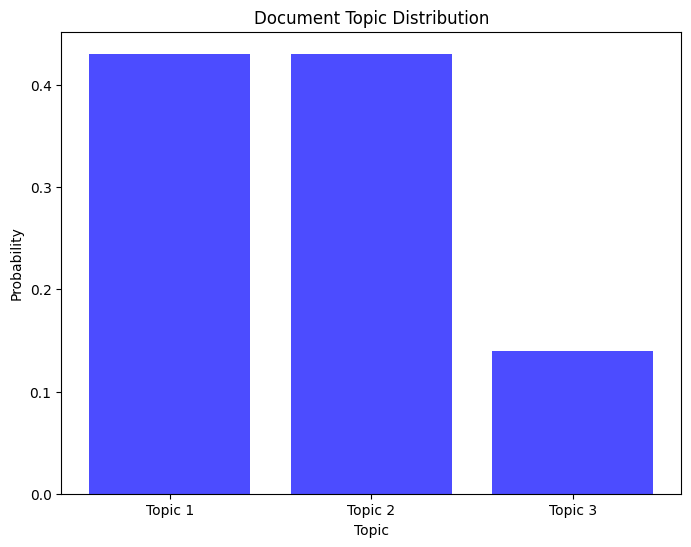


Document Topic Distribution: [0.81789846 0.00498837 0.17711317]


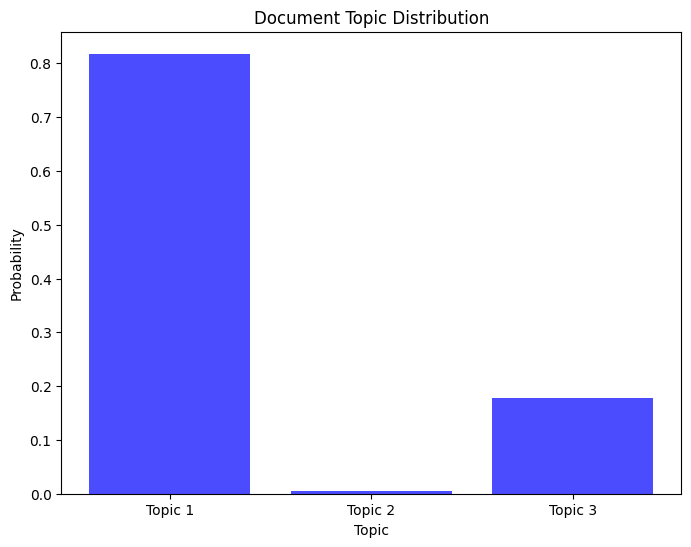


Document Topic Distribution: [0.03311558 0.02875359 0.93813083]


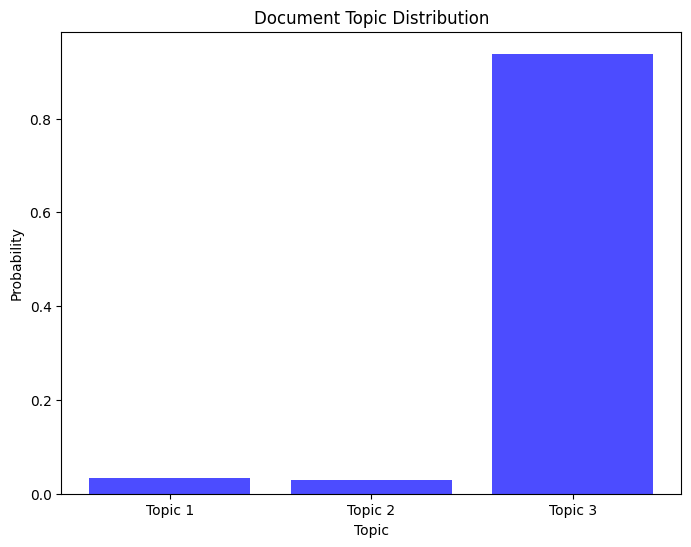

'\nprint(\'\n\' + f"Document Topic Distribution: {document_topic_distribution[3]}")\n\n# Plotting the document topic distribution\nplt.figure(figsize=(8, 6))\nplt.bar(range(len(document_topic_distribution[3])), document_topic_distribution[3], color=\'blue\', alpha=0.7)\nplt.xlabel(\'Topic\')\nplt.ylabel(\'Probability\')\nplt.title(\'Document Topic Distribution\')\nplt.xticks(range(len(document_topic_distribution[3])), labels=[f\'Topic {i+1}\' for i in range(len(document_topic_distribution[3]))])\nplt.show()\n\nprint(\'\n\' + f"Document Topic Distribution: {document_topic_distribution[4]}")\n\n# Plotting the document topic distribution\nplt.figure(figsize=(8, 6))\nplt.bar(range(len(document_topic_distribution[4])), document_topic_distribution[4], color=\'blue\', alpha=0.7)\nplt.xlabel(\'Topic\')\nplt.ylabel(\'Probability\')\nplt.title(\'Document Topic Distribution\')\nplt.xticks(range(len(document_topic_distribution[4])), labels=[f\'Topic {i+1}\' for i in range(len(document_topic_distri

In [43]:
# Sample documents
documents = citigroup_df['comment'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 3
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents)

# Get the top words for each topic
feature_names = pipeline.named_steps['vect'].get_feature_names_out()
lda_components = pipeline.named_steps['lda'].components_
top_words_per_topic = []

for topic_weights in lda_components:
    top_word_indices = topic_weights.argsort()[-5:][::-1]
    top_words = [feature_names[i] for i in top_word_indices]
    top_words_per_topic.append(top_words)

# Print the top words for each topic
for i, top_words in enumerate(top_words_per_topic):
    print(f"Topic #{i + 1}: {', '.join(top_words)}")

# Transform the preprocessed documents to get the document-topic distribution
document_topic_distribution = pipeline.transform(preprocessed_documents)

# Print the document-topic distribution for the first document
print('\n' + f"Document Topic Distribution: {document_topic_distribution[0]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[0])), document_topic_distribution[0], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[0])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[0]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[1]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[1])), document_topic_distribution[1], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[1])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[1]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[2]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[2])), document_topic_distribution[2], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[2])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[2]))])
plt.show()

'''
print('\n' + f"Document Topic Distribution: {document_topic_distribution[3]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[3])), document_topic_distribution[3], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[3])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[3]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[4]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[4])), document_topic_distribution[4], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[4])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[4]))])
plt.show()
'''

## UBS Dataset

In [44]:
# Specify the element you want to filter for in the link
target_element = 'ubs'
target = ['ubs','Union Bank of Switzerland'] 

# Reset the index to avoid duplicate index labels
df3 = df3.reset_index(drop=True)

url_mask = df3['url'].str.contains(fr'/r/{target_element}/', case=False)

# Convert the target keywords to lowercase
lowercase_target = [keyword.lower() for keyword in target]

# Use any() to check if any element in the 'target' list is present in 'comment' and 'submission_comment'
comment_mask = df3['comment'].apply(lambda x: any(keyword in x.lower() for keyword in lowercase_target))
submission_comment_mask = df3['submission_comment'].apply(lambda x: any(keyword in x.lower() for keyword in lowercase_target))

# Combine the masks using logical OR
ubs_values = url_mask | comment_mask | submission_comment_mask

# Apply the mask to subset the DataFrame
ubs_df = df3[ubs_values]
ubs_df.drop_duplicates(inplace=True)

# Display the result
ubs_df

C:\Users\gabri\AppData\Local\Temp\ipykernel_12592\2918986804.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ubs_df.drop_duplicates(inplace=True)


,title,post_id,author,submission_date,score,upvote_ratio,url,num_comments,subreddit_subscribers,link_flair_text,submission_comment,comment_link,comment,comment_score,comment_created_date
11,WARNING - Kevin O'Leary Event (Workshop),bgvhmm,not-a-pyramidscheme,2019-04-24 10:46,568,0.97,https://www.reddit.com/r/PersonalFinanceCanada...,126,1308212,NaN,Was told to post here. Original post: [https...,https://www.reddit.com/r/PersonalFinanceCanada...,This is what 99% of financial seminars are. Th...,245.0,2019-04-24 11:37
12,WARNING - Kevin O'Leary Event (Workshop),bgvhmm,not-a-pyramidscheme,2019-04-24 10:46,568,0.97,https://www.reddit.com/r/PersonalFinanceCanada...,126,1308212,NaN,Was told to post here. Original post: [https...,https://www.reddit.com/r/PersonalFinanceCanada...,[deleted],76.0,2019-04-24 11:51
13,WARNING - Kevin O'Leary Event (Workshop),bgvhmm,not-a-pyramidscheme,2019-04-24 10:46,568,0.97,https://www.reddit.com/r/PersonalFinanceCanada...,126,1308212,NaN,Was told to post here. Original post: [https...,https://www.reddit.com/r/PersonalFinanceCanada...,I would not pay for anything that had Kevin O’...,117.0,2019-04-24 11:20
14,WARNING - Kevin O'Leary Event (Workshop),bgvhmm,not-a-pyramidscheme,2019-04-24 10:46,568,0.97,https://www.reddit.com/r/PersonalFinanceCanada...,126,1308212,NaN,Was told to post here. Original post: [https...,https://www.reddit.com/r/PersonalFinanceCanada...,>Regardless of your political or personal stan...,56.0,2019-04-24 15:00
15,WARNING - Kevin O'Leary Event (Workshop),bgvhmm,not-a-pyramidscheme,2019-04-24 10:46,568,0.97,https://www.reddit.com/r/PersonalFinanceCanada...,126,1308212,NaN,Was told to post here. Original post: [https...,https://www.reddit.com/r/PersonalFinanceCanada...,>He's hoping to win the conservative race and ...,36.0,2019-04-24 12:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112797,CS majors who complain about diversity have un...,15s5x0e,Comprehensive_Bet920,2023-08-15 17:37:30,600,0.66,https://www.reddit.com/r/csMajors/comments/15s...,872,221702,NaN,CS majors complain about “diversity hiring” an...,https://www.reddit.com/r/csMajors/comments/15s...,>You might have an issue with behavioral tests...,1,2023-08-16 18:14:00
113089,Anyone hear anything back from The Washington ...,yigxpk,FlorentineKnight,2022-10-31 12:32:30,8,0.83,https://www.reddit.com/r/csMajors/comments/yig...,30,221702,NaN,I was told I had passed the initial screen abo...,https://www.reddit.com/r/csMajors/comments/yig...,"Passed initial round for one team, Subscriptio...",1,2022-11-01 00:31:22
113143,Those who got into faang. What did your resume...,tpve3a,senator732,2022-03-27 18:55:00,31,0.97,https://www.reddit.com/r/csMajors/comments/tpv...,15,221702,NaN,I'd like to start working to make mine look li...,https://www.reddit.com/r/csMajors/comments/tpv...,Context: International student at Top 100(I th...,4,2022-03-28 10:06:33
113213,CIBC Mobile How To Manage Subscriptions,12hp36f,Branawaan,2023-04-10 13:08:57,3,1.0,https://www.reddit.com/r/CIBC/comments/12hp36f...,2,537,NaN,I've subscribed to a few things but I don't wa...,https://www.reddit.com/r/CIBC/comments/12hp36f...,if you’re looking for stop payments i don’t be...,2,2023-04-10 17:25:23


Topic #1: like, just, year, people, time
Topic #2: tax, stock, year, company, money
Topic #3: money, bb, company, http, like

Document Topic Distribution: [0.03412188 0.92725161 0.03862651]


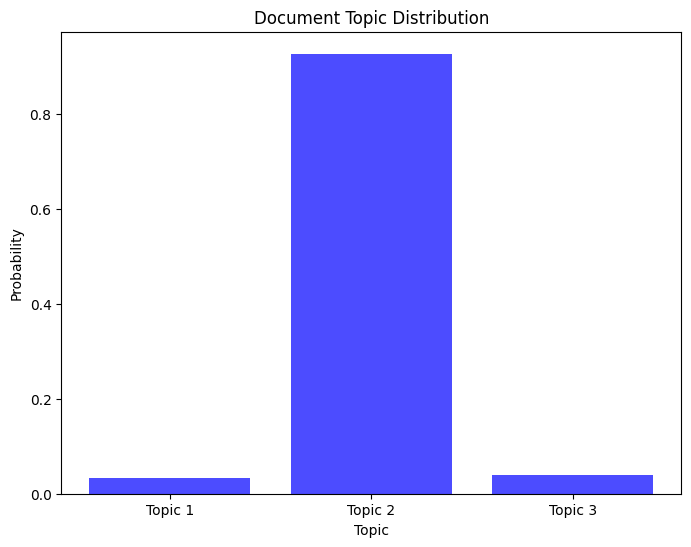


Document Topic Distribution: [0.16667082 0.66665659 0.16667259]


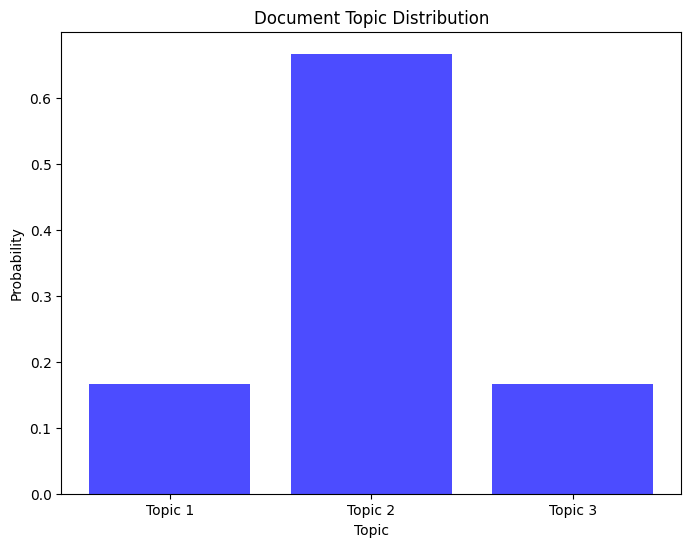


Document Topic Distribution: [0.85455168 0.07469106 0.07075726]


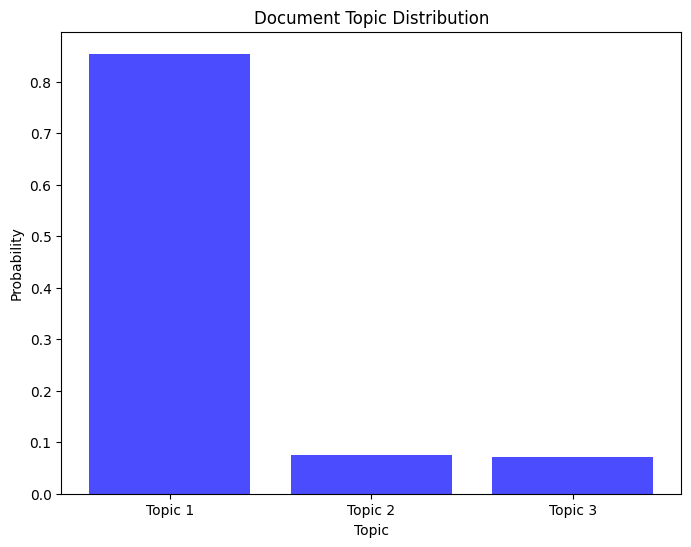

'\nprint(\'\n\' + f"Document Topic Distribution: {document_topic_distribution[3]}")\n\n# Plotting the document topic distribution\nplt.figure(figsize=(8, 6))\nplt.bar(range(len(document_topic_distribution[3])), document_topic_distribution[3], color=\'blue\', alpha=0.7)\nplt.xlabel(\'Topic\')\nplt.ylabel(\'Probability\')\nplt.title(\'Document Topic Distribution\')\nplt.xticks(range(len(document_topic_distribution[3])), labels=[f\'Topic {i+1}\' for i in range(len(document_topic_distribution[3]))])\nplt.show()\n\nprint(\'\n\' + f"Document Topic Distribution: {document_topic_distribution[4]}")\n\n# Plotting the document topic distribution\nplt.figure(figsize=(8, 6))\nplt.bar(range(len(document_topic_distribution[4])), document_topic_distribution[4], color=\'blue\', alpha=0.7)\nplt.xlabel(\'Topic\')\nplt.ylabel(\'Probability\')\nplt.title(\'Document Topic Distribution\')\nplt.xticks(range(len(document_topic_distribution[4])), labels=[f\'Topic {i+1}\' for i in range(len(document_topic_distri

In [45]:
# Sample documents
documents = ubs_df['comment'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 3
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents)

# Get the top words for each topic
feature_names = pipeline.named_steps['vect'].get_feature_names_out()
lda_components = pipeline.named_steps['lda'].components_
top_words_per_topic = []

for topic_weights in lda_components:
    top_word_indices = topic_weights.argsort()[-5:][::-1]
    top_words = [feature_names[i] for i in top_word_indices]
    top_words_per_topic.append(top_words)

# Print the top words for each topic
for i, top_words in enumerate(top_words_per_topic):
    print(f"Topic #{i + 1}: {', '.join(top_words)}")

# Transform the preprocessed documents to get the document-topic distribution
document_topic_distribution = pipeline.transform(preprocessed_documents)

# Print the document-topic distribution for the first document
print('\n' + f"Document Topic Distribution: {document_topic_distribution[0]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[0])), document_topic_distribution[0], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[0])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[0]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[1]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[1])), document_topic_distribution[1], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[1])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[1]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[2]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[2])), document_topic_distribution[2], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[2])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[2]))])
plt.show()

'''
print('\n' + f"Document Topic Distribution: {document_topic_distribution[3]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[3])), document_topic_distribution[3], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[3])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[3]))])
plt.show()

print('\n' + f"Document Topic Distribution: {document_topic_distribution[4]}")

# Plotting the document topic distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(document_topic_distribution[4])), document_topic_distribution[4], color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document Topic Distribution')
plt.xticks(range(len(document_topic_distribution[4])), labels=[f'Topic {i+1}' for i in range(len(document_topic_distribution[4]))])
plt.show()
'''

In [46]:
documents

["This is what 99% of financial seminars are. They're almost all sales funnels to an overpriced course. Real estate seminars it's 100%.",
 '[deleted]',
 'I would not pay for anything that had Kevin O’Leary’s name attached to it.',
 '>Regardless of your political or personal stance, a chance to build wealth and learn from such an individual is an opportunity. One where you can get all your money back? That\'s a risk free opportunity.\n\nYou have no idea how tempted I am to make a "I have a bridge to sell you" joke, but that wouldn\'t be helping anybody, which is the point of this sub.\n\nAs a rule of thumb, always treat "money back guarantees" offered by a business, any business, as a potential bait/switch situation. It\'s not at all risk free like you\'ve stated and have now personally experienced, because scams that arise from "money back guarantees" are so commonplace that the [FTC in the US had to codify regulations specifically addressing the words "money back guarantee" used in ad